<a href="https://colab.research.google.com/github/NikRed17/Dataset8/blob/main/ML_Praktika6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика 6 Итоговое творческое задание
# Выполнили: Панина Даната и Селиванов Николай БПМ-23-1



# Проект: Предсказание диабета на основе медицинских и поведенческих данных

## Трек B — Классификация (бинарная)

## 1. Постановка задачи и выбор метрик

Задача:

Бинарная классификация — предсказать, есть ли у пациента диабет (diabetes = 1) или нет (diabetes = 0).

Цель:

Построить модель, которая по анонимизированным признакам пациента (возраст, BMI, уровень глюкозы, давление и др.) сможет предсказать вероятность наличия диабета.

Метрики качества:

F1-score (основная) — баланс между точностью и полнотой, важен при дисбалансе классов.

ROC-AUC — показывает способность модели разделять классы.

Precision-Recall AUC — хороший выбор при сильном дисбалансе классов.

Confusion Matrix — для анализа ошибок и выявления типа ошибок (ложноположительные/ложноотрицательные).


## 2. Данные
Источник: датасет diabetes.csv из Kaggle.

Описание:

10000 строк, 20 признаков.

Целевая переменная: diabetes (0/1).

Признаки:

Демография: age, gender

Медицинские: bmi, glucose, blood_pressure, cholesterol, insulin

Образ жизни: sleep_hours, physical_activity (Low/Medium/High), smoking, alcohol_intake, steps_per_day, water_intake_ltr, work_hours

Семейный анамнез и стресс: family_history, stress_level

Диета и прочее: diet_score





 1. НОМИНАЛЬНЫЕ ПЕРЕМЕННЫЕ (Nominal Variables)
Не имеют порядка и сравнения, категории равноправны:

Бинарные номинальные:
gender — пол (Male/Female)
Обоснование: нет естественного порядка между Male и Female, это просто разные категории

smoking — курение (0 = нет, 1 = да)
*Обоснование: хотя представлено числами 0/1, это категориальный признак без порядка*

alcohol_intake — употребление алкоголя (0 = нет, 1 = да)
Обоснование: аналогично smoking — категориальный бинарный признак

family_history — семейный анамнез диабета (0 = нет, 1 = да)
Обоснование: бинарная категория без порядка

diabetes — наличие диабета (0 = нет, 1 = да)
Обоснование: целевая переменная, бинарная категория

Почему эти бинарные переменные номинальные, а не порядковые?
Хотя они имеют числовое представление (0/1), математические операции с ними бессмысленны:

"Среднее значение smoking" не имеет физического смысла

"Сумма alcohol_intake" по нескольким пациентам неинтерпретируема

Разница между 0 и 1 — это качественное, а не количественное различие

2. ПОРЯДКОВЫЕ ПЕРЕМЕННЫЕ (Ordinal Variables)
Имеют порядок, но математические операции не имеют смысла:

physical_activity — уровень физической активности (Low/Medium/High)
Обоснование: очевидный порядок: Low < Medium < High, но "Medium - Low" не равно "High - Medium"

stress_level — уровень стресса (шкала 1-10)
Обоснование: имеет порядок (1 < 2 < ... < 10), но:
Гипотеза 1: порядковая — разница между 5 и 6 ≠ разнице между 8 и 9
Гипотеза 2: интервальная — если шкала линейна, может считаться числовой
Принимаем как порядковую, так как психологические шкалы часто нелинейны

diet_score — оценка качества питания (шкала 1-10)
Обоснование: аналогично stress_level — порядок есть, но линейность под вопросом
Гипотеза: порядковая, так как оценка субъективна

3. ЧИСЛОВЫЕ НЕПРЕРЫВНЫЕ ПЕРЕМЕННЫЕ (Continuous Numerical Variables)
Имеют порядок и смысл математических операций:

Абсолютные непрерывные:
age — возраст (в годах)
*Обоснование: имеет физический смысл, разница между 30 и 40 лет = 10 лет*

bmi — индекс массы тела (кг/м²)
Обоснование: непрерывная физическая величина

glucose — уровень глюкозы (mg/dL)
Обоснование: биохимический показатель, непрерывный

blood_pressure — артериальное давление (мм рт. ст.)
Обоснование: физиологический параметр, непрерывный

cholesterol — уровень холестерина (mg/dL)
Обоснование: биохимический показатель, непрерывный

heart_rate — частота сердечных сокращений (уд/мин)
Обоснование: физиологический параметр, непрерывный

insulin — уровень инсулина (µIU/mL)
Обоснование: биохимический показатель, непрерывный

Дискретные, но трактуемые как непрерывные (Continuous-discrete):
sleep_hours — продолжительность сна (часы)
*Гипотеза 1: дискретная — измеряется целыми/половинными часами*
Гипотеза 2: непрерывная — время сна физически непрерывно
Принимаем как непрерывную для анализа

steps_per_day — количество шагов
Гипотеза 1: дискретная — целые числа
Гипотеза 2: непрерывная — при больших значениях трактуется как непрерывная
Принимаем как непрерывную для статистического анализа

work_hours — рабочие часы
Аналогично steps_per_day

water_intake_ltr — потребление воды (литры)
Обоснование: физически непрерывная величина, может измеряться дробно

4. ТЕХНИЧЕСКАЯ ПЕРЕМЕННАЯ
id — уникальный идентификатор пациента
Обоснование: технический признак, не несет информации для модели, должен быть удален


ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
1. ОБЩАЯ ИНФОРМАЦИЯ:
----------------------------------------
Размер датасета: 10000 строк, 20 столбцов

Первые 5 строк:
   id  age  gender    bmi  glucose  blood_pressure  cholesterol  heart_rate  \
0   1   69    Male  23.30      170             137          139          66   
1   2   32    Male  25.00      184             177          250          75   
2   3   89  Female  28.57       87             164          225         102   
3   4   78    Male  15.85       96             113          158         112   
4   5   38  Female  35.74      171             122          193         109   

   sleep_hours physical_activity  smoking  alcohol_intake  family_history  \
0          6.4              High        1               1               1   
1          6.4            Medium        0               1               1   
2          7.5            Medium        1               0               0   
3          6.9               Low        0               1               

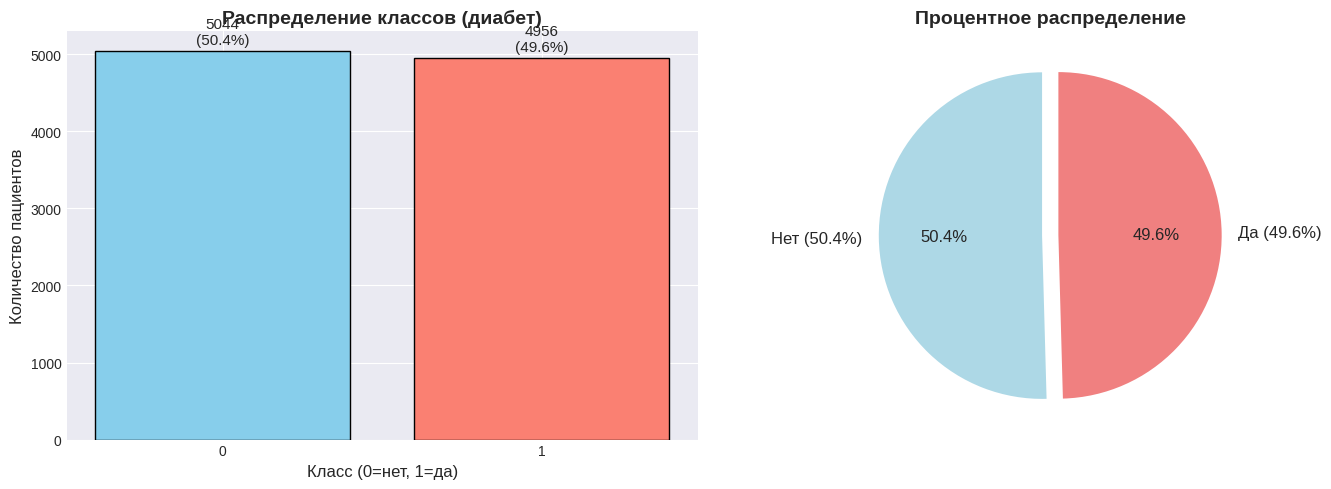


Коэффициент дисбаланса: 1.02
✓ Дисбаланс классов незначительный.

6. СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ:
----------------------------------------
Основные статистики:
                    count      mean      std      min      25%       50%  \
age               10000.0     53.54    20.76    18.00    36.00     53.00   
bmi               10000.0     24.99     4.90     7.55    21.63     24.94   
glucose           10000.0    133.97    37.65    70.00   101.00    134.00   
blood_pressure    10000.0    129.48    29.04    80.00   104.00    129.00   
cholesterol       10000.0    209.34    52.14   120.00   164.00    210.00   
heart_rate        10000.0     89.70    17.14    60.00    75.00     90.00   
sleep_hours       10000.0      6.53     2.03     3.00     4.80      6.50   
stress_level      10000.0      5.48     2.88     1.00     3.00      5.00   
diet_score        10000.0      5.50     2.89     1.00     3.00      6.00   
steps_per_day     10000.0  10502.64  5503.03  1000.00  5688.00  10527.00  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

# Загрузка данных
df = pd.read_csv('diabetes.csv')

print("=" * 80)
print("ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")
print("=" * 80)

# 1. Общая информация о датасете
print("1. ОБЩАЯ ИНФОРМАЦИЯ:")
print("-" * 40)
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о типах данных:")
print(df.info())

# 2. Проверка пропусков
print("\n" + "=" * 80)
print("2. ПРОВЕРКА ПРОПУСКОВ:")
print("-" * 40)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
})

# Отображаем только столбцы с пропусками
missing_df = missing_df[missing_df['Количество пропусков'] > 0]
if len(missing_df) > 0:
    print("Обнаружены пропуски:")
    print(missing_df)
else:
    print("Пропуски не обнаружены!")

# 3. Проверка дубликатов
print("\n" + "=" * 80)
print("3. ПРОВЕРКА ДУБЛИКАТОВ:")
print("-" * 40)
duplicates = df.duplicated().sum()
print(f"Полные дубликаты строк: {duplicates}")
if duplicates > 0:
    print("Пример дубликатов:")
    print(df[df.duplicated(keep='first')].head())

# Проверка дубликатов по id (если он должен быть уникальным)
if 'id' in df.columns:
    id_duplicates = df['id'].duplicated().sum()
    print(f"\nДубликаты в столбце 'id': {id_duplicates}")
    if id_duplicates > 0:
        print("Пример дубликатов id:")
        duplicate_ids = df['id'][df['id'].duplicated()].unique()
        print(duplicate_ids[:5])

# 4. Определение типов признаков
print("\n" + "=" * 80)
print("4. ТИПЫ ПРИЗНАКОВ:")
print("-" * 40)

# Создаем словарь для классификации признаков
feature_types = {
    'Числовые непрерывные': [],
    'Числовые дискретные': [],
    'Категориальные (бинарные)': [],
    'Категориальные (ординальные)': [],
    'Категориальные (номинальные)': []
}

# Автоматическая классификация по типам данных
for col in df.columns:
    # Пропускаем id и целевую переменную для отдельного анализа
    if col in ['id', 'diabetes']:
        continue

    # Проверяем тип данных
    if df[col].dtype in ['int64', 'float64']:
        # Проверяем, является ли дискретным (мало уникальных значений)
        unique_count = df[col].nunique()
        if unique_count <= 10 and unique_count < len(df) * 0.01:
            # Проверяем на бинарные признаки (0/1)
            if set(df[col].unique()).issubset({0, 1}):
                feature_types['Категориальные (бинарные)'].append(col)
            else:
                feature_types['Числовые дискретные'].append(col)
        else:
            feature_types['Числовые непрерывные'].append(col)
    else:
        # Строковые/объектные признаки
        unique_count = df[col].nunique()
        if unique_count <= 10:
            # Проверяем на упорядоченность (например, Low, Medium, High)
            if col == 'physical_activity':
                feature_types['Категориальные (ординальные)'].append(col)
            else:
                feature_types['Категориальные (номинальные)'].append(col)

# Выводим классификацию
for feature_type, columns in feature_types.items():
    if columns:
        print(f"\n{feature_type} ({len(columns)}):")
        for col in columns:
            unique_vals = df[col].nunique()
            print(f"  - {col}: {unique_count} уникальных значений")

# Анализ отдельных важных столбцов
print("\n" + "-" * 40)
print("АНАЛИЗ ОСОБЫХ ПРИЗНАКОВ:")
print("-" * 40)

# gender
if 'gender' in df.columns:
    print(f"\nРаспределение 'gender':")
    print(df['gender'].value_counts(dropna=False))

# physical_activity
if 'physical_activity' in df.columns:
    print(f"\nРаспределение 'physical_activity':")
    print(df['physical_activity'].value_counts(dropna=False))

# Бинарные признаки
binary_features = ['smoking', 'alcohol_intake', 'family_history']
for col in binary_features:
    if col in df.columns:
        print(f"\nРаспределение '{col}':")
        print(df[col].value_counts(dropna=False))

# 5. Анализ дисбаланса классов
print("\n" + "=" * 80)
print("5. ДИСБАЛАНС КЛАССОВ:")
print("-" * 40)

if 'diabetes' in df.columns:
    # Статистика по целевому признаку
    class_distribution = df['diabetes'].value_counts()
    class_percentage = df['diabetes'].value_counts(normalize=True) * 100

    print(f"Распределение классов:")
    for cls in sorted(class_distribution.index):
        print(f"  Класс {cls}: {class_distribution[cls]} ({class_percentage[cls]:.2f}%)")

    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Столбчатая диаграмма
    axes[0].bar(class_distribution.index.astype(str), class_distribution.values,
                color=['skyblue', 'salmon'], edgecolor='black')
    axes[0].set_title('Распределение классов (диабет)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Класс (0=нет, 1=да)', fontsize=12)
    axes[0].set_ylabel('Количество пациентов', fontsize=12)

    # Добавляем значения на столбцы
    for i, v in enumerate(class_distribution.values):
        axes[0].text(i, v + max(class_distribution.values)*0.01,
                    f"{v}\n({class_percentage.iloc[i]:.1f}%)",
                    ha='center', va='bottom', fontsize=11)

    # Круговая диаграмма
    colors = ['lightblue', 'lightcoral']
    explode = (0.05, 0.05) if len(class_distribution) == 2 else (0.05,)

    axes[1].pie(class_distribution.values, labels=[f'Нет ({class_percentage[0]:.1f}%)',
                                                   f'Да ({class_percentage[1]:.1f}%)'],
                autopct='%1.1f%%', colors=colors, explode=explode,
                startangle=90, textprops={'fontsize': 12})
    axes[1].set_title('Процентное распределение', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Оценка дисбаланса
    imbalance_ratio = max(class_distribution) / min(class_distribution)
    print(f"\nКоэффициент дисбаланса: {imbalance_ratio:.2f}")

    if imbalance_ratio > 2:
        print("⚠️ Обнаружен значительный дисбаланс классов!")
    elif imbalance_ratio > 1.5:
        print("⚠️ Обнаружен умеренный дисбаланс классов.")
    else:
        print("✓ Дисбаланс классов незначительный.")

# 6. Статистика по числовым признакам
print("\n" + "=" * 80)
print("6. СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ:")
print("-" * 40)

# Выбираем числовые признаки (исключая id и бинарные)
numeric_cols = []
for col in df.columns:
    if col not in ['id', 'diabetes'] and df[col].dtype in ['int64', 'float64']:
        if col not in binary_features:  # Исключаем бинарные
            numeric_cols.append(col)

if numeric_cols:
    # Базовая статистика
    print("Основные статистики:")
    stats_df = df[numeric_cols].describe().transpose()
    stats_df['missing'] = df[numeric_cols].isnull().sum()
    stats_df['missing_%'] = (stats_df['missing'] / len(df)) * 100
    stats_df['unique'] = df[numeric_cols].nunique()

    # Отображаем важные колонки
    display_cols = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'unique']
    print(stats_df[display_cols].round(2))

    # Проверка на выбросы (простейшая - через IQR)
    print("\nПотенциальные выбросы (по IQR):")
    for col in numeric_cols[:5]:  # Показываем только первые 5 для краткости
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percent = (len(outliers) / len(df)) * 100

        if len(outliers) > 0:
            print(f"  {col}: {len(outliers)} выбросов ({outlier_percent:.1f}%)")

# 7. Сводка
print("\n" + "=" * 80)
print("СВОДКА ПЕРВИЧНОГО АНАЛИЗА:")
print("=" * 80)

summary = {
    "Общий размер": f"{df.shape[0]} строк × {df.shape[1]} столбцов",
    "Пропуски": "Нет" if df.isnull().sum().sum() == 0 else f"Да ({df.isnull().sum().sum()} всего)",
    "Дубликаты строк": f"{duplicates}",
    "Целевая переменная": f"'diabetes' (бинарная: 0/1)",
    "Дисбаланс классов": f"{class_percentage[0]:.1f}% vs {class_percentage[1]:.1f}%",
    "Типы признаков": f"Числовых: {len(feature_types['Числовые непрерывные']) + len(feature_types['Числовые дискретные'])}, "
                     f"Категориальных: {len(feature_types['Категориальные (бинарные)']) + len(feature_types['Категориальные (ординальные)']) + len(feature_types['Категориальные (номинальные)'])}"
}

for key, value in summary.items():
    print(f"  {key}: {value}")


In [2]:
df

,id,age,gender,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes
0,1,69,Male,23.30,170,137,139,66,6.4,High,1,1,1,8,3,8760,6,3.6,33,0
1,2,32,Male,25.00,184,177,250,75,6.4,Medium,0,1,1,4,7,7682,11,4.1,36,0
2,3,89,Female,28.57,87,164,225,102,7.5,Medium,1,0,0,6,5,15025,8,1.4,46,1
3,4,78,Male,15.85,96,113,158,112,6.9,Low,0,1,1,2,7,4645,4,4.4,171,1
4,5,38,Female,35.74,171,122,193,109,7.4,Medium,0,1,0,6,9,7862,13,3.9,235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,88,Female,27.90,164,126,215,98,3.7,Low,1,1,1,7,8,17545,13,5.0,284,0
9996,9997,43,Male,30.69,72,148,206,70,9.1,Low,1,1,0,3,5,1948,5,1.1,211,0
9997,9998,63,Male,32.13,115,158,216,79,8.3,High,1,1,0,4,2,3537,5,4.1,242,0
9998,9999,63,Female,26.00,105,81,213,85,5.7,High,0,0,0,9,10,19295,11,3.5,166,0


РАСШИРЕННЫЙ EDA АНАЛИЗ ДАННЫХ

1. АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ
----------------------------------------


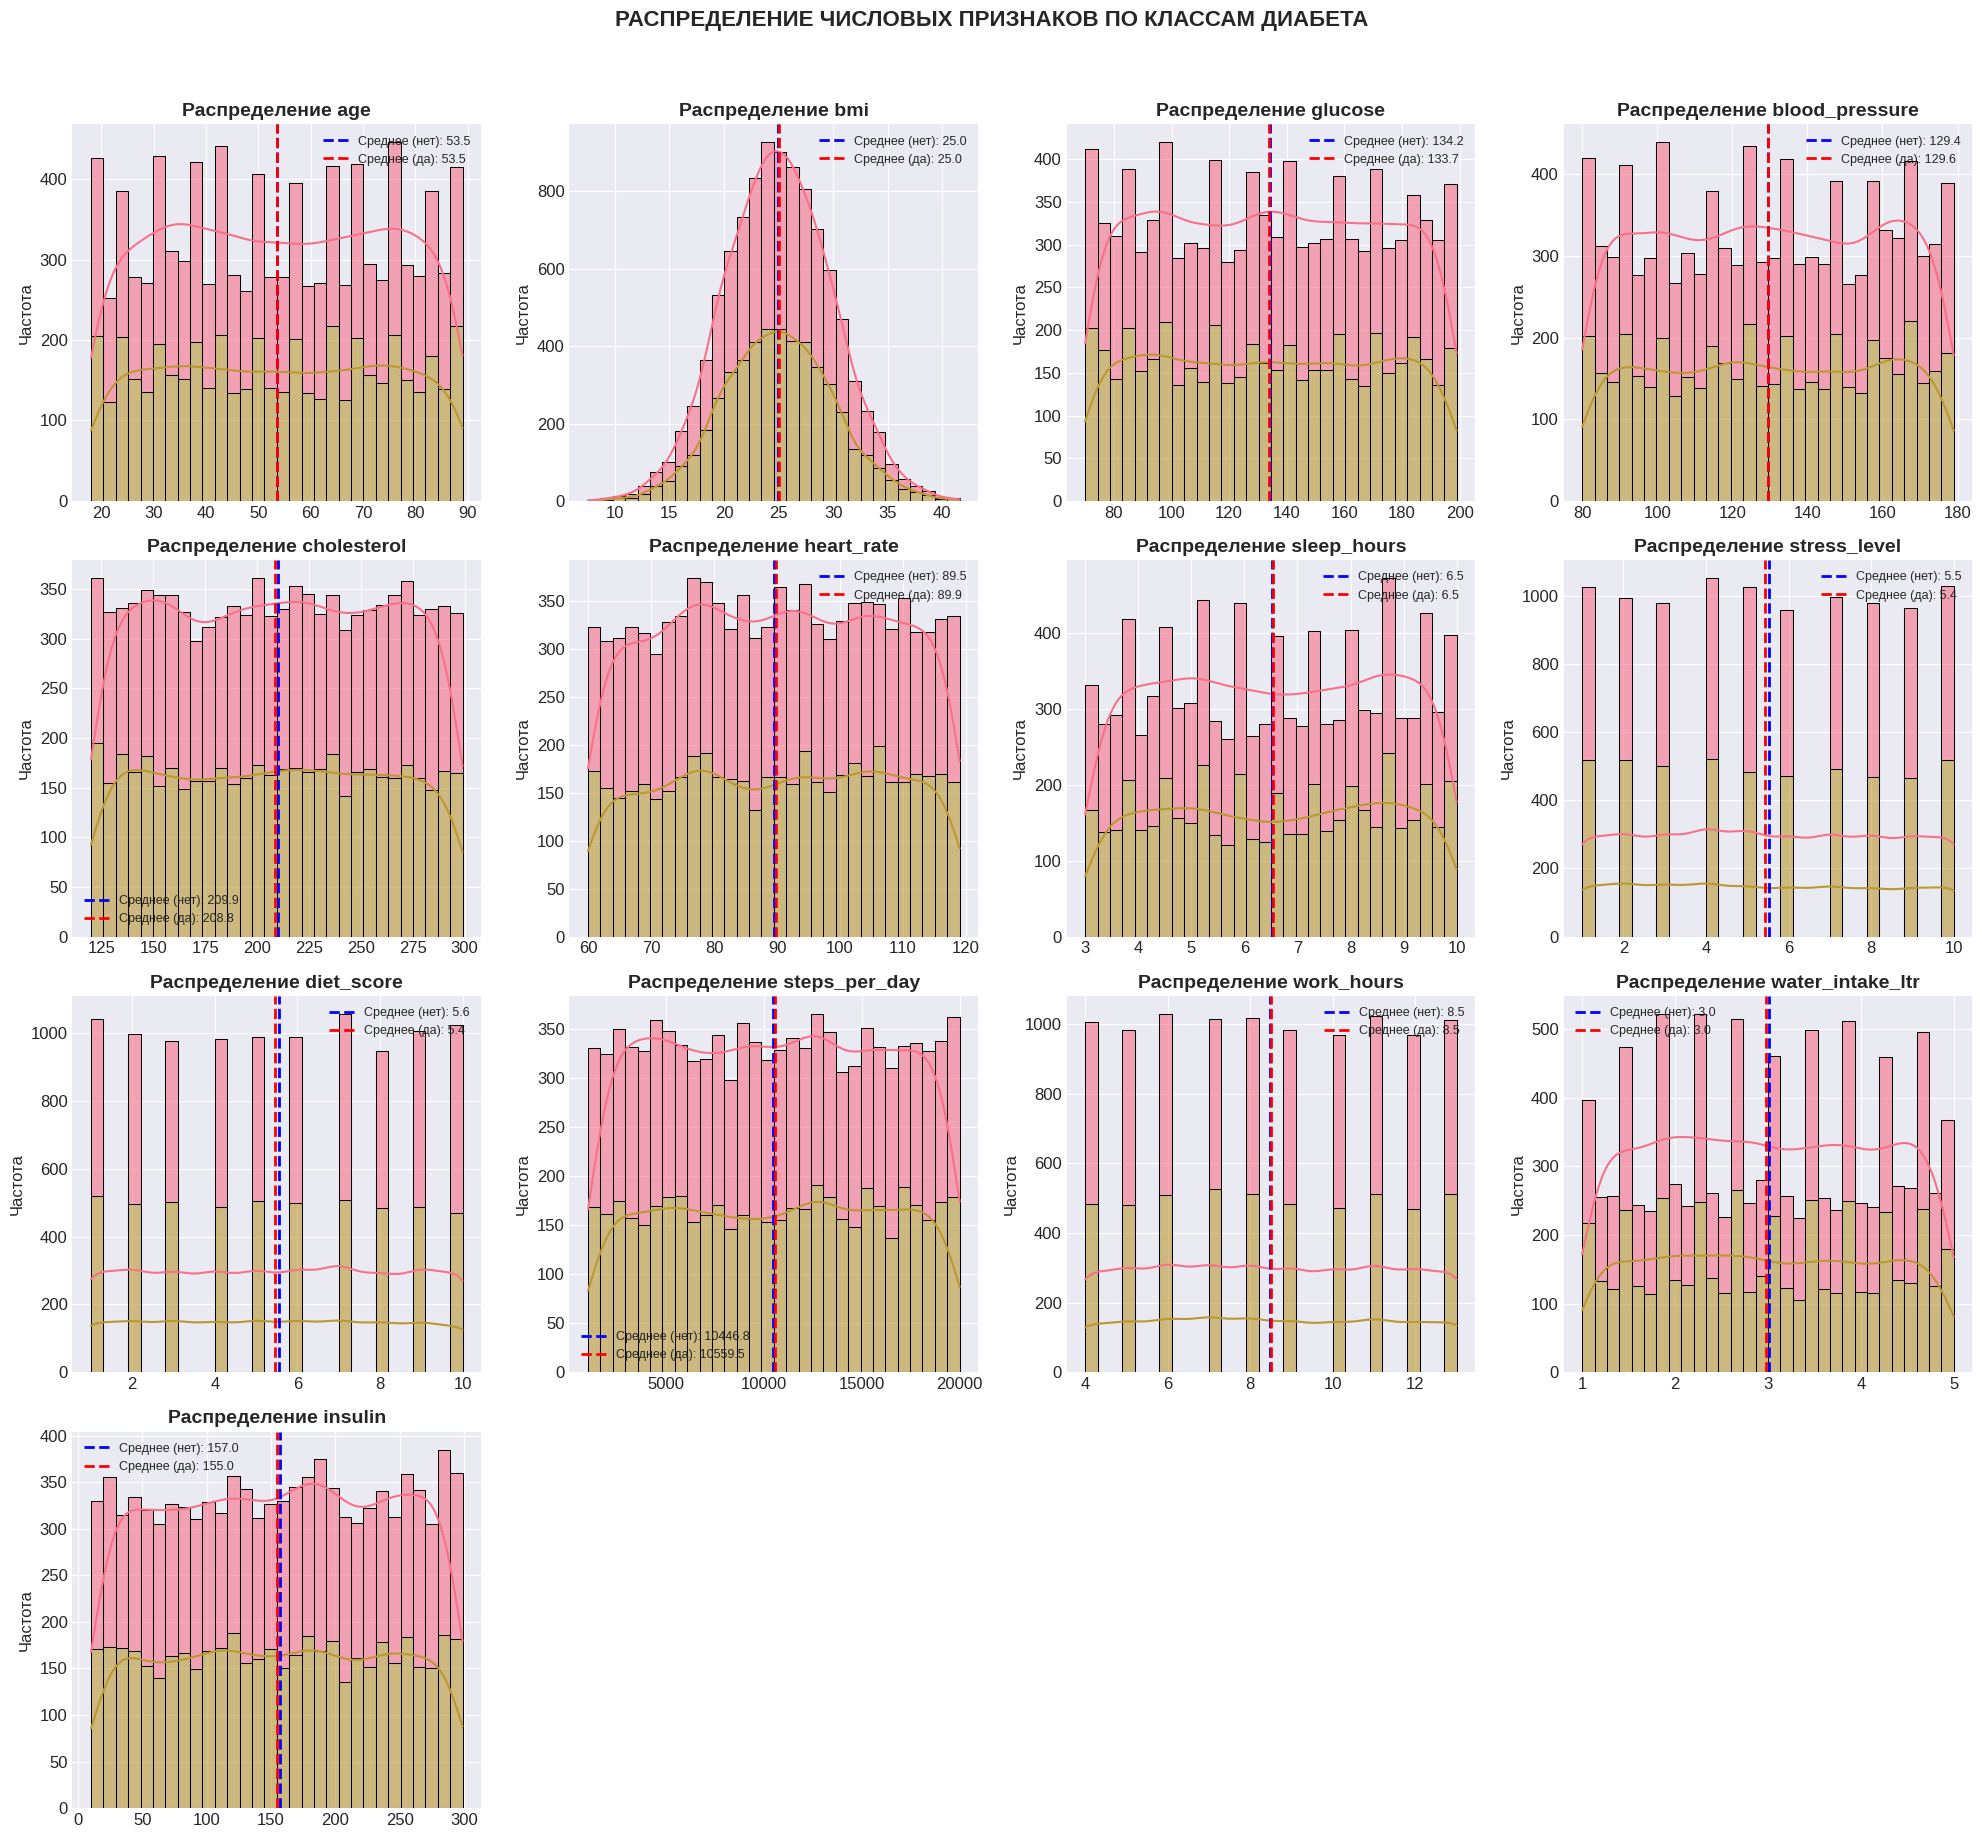


2. СРАВНЕНИЕ СРЕДНИХ ЗНАЧЕНИЙ ПО КЛАССАМ ДИАБЕТА
----------------------------------------
Топ-10 самых различимых признаков:
         Признак  Среднее (нет)  Среднее (да)  Разница %  p-значение Значимо (p<0.05)
      diet_score       5.550753      5.444915  -1.906734    0.066872              НЕТ
    stress_level       5.523196      5.435432  -1.589009    0.127472              НЕТ
         insulin     156.964116    155.035109  -1.228948    0.249600              НЕТ
water_intake_ltr       3.010706      2.975767  -1.160493    0.131636              НЕТ
   steps_per_day   10446.798374  10559.471550   1.078543    0.306002              НЕТ
     cholesterol     209.916733    208.759483  -0.551290    0.267148              НЕТ
      heart_rate      89.496630     89.899112   0.449718    0.240353              НЕТ
     sleep_hours       6.516534      6.545662   0.446976    0.473952              НЕТ
         glucose     134.205789    133.736885  -0.349392    0.533499              НЕТ
      work_hou

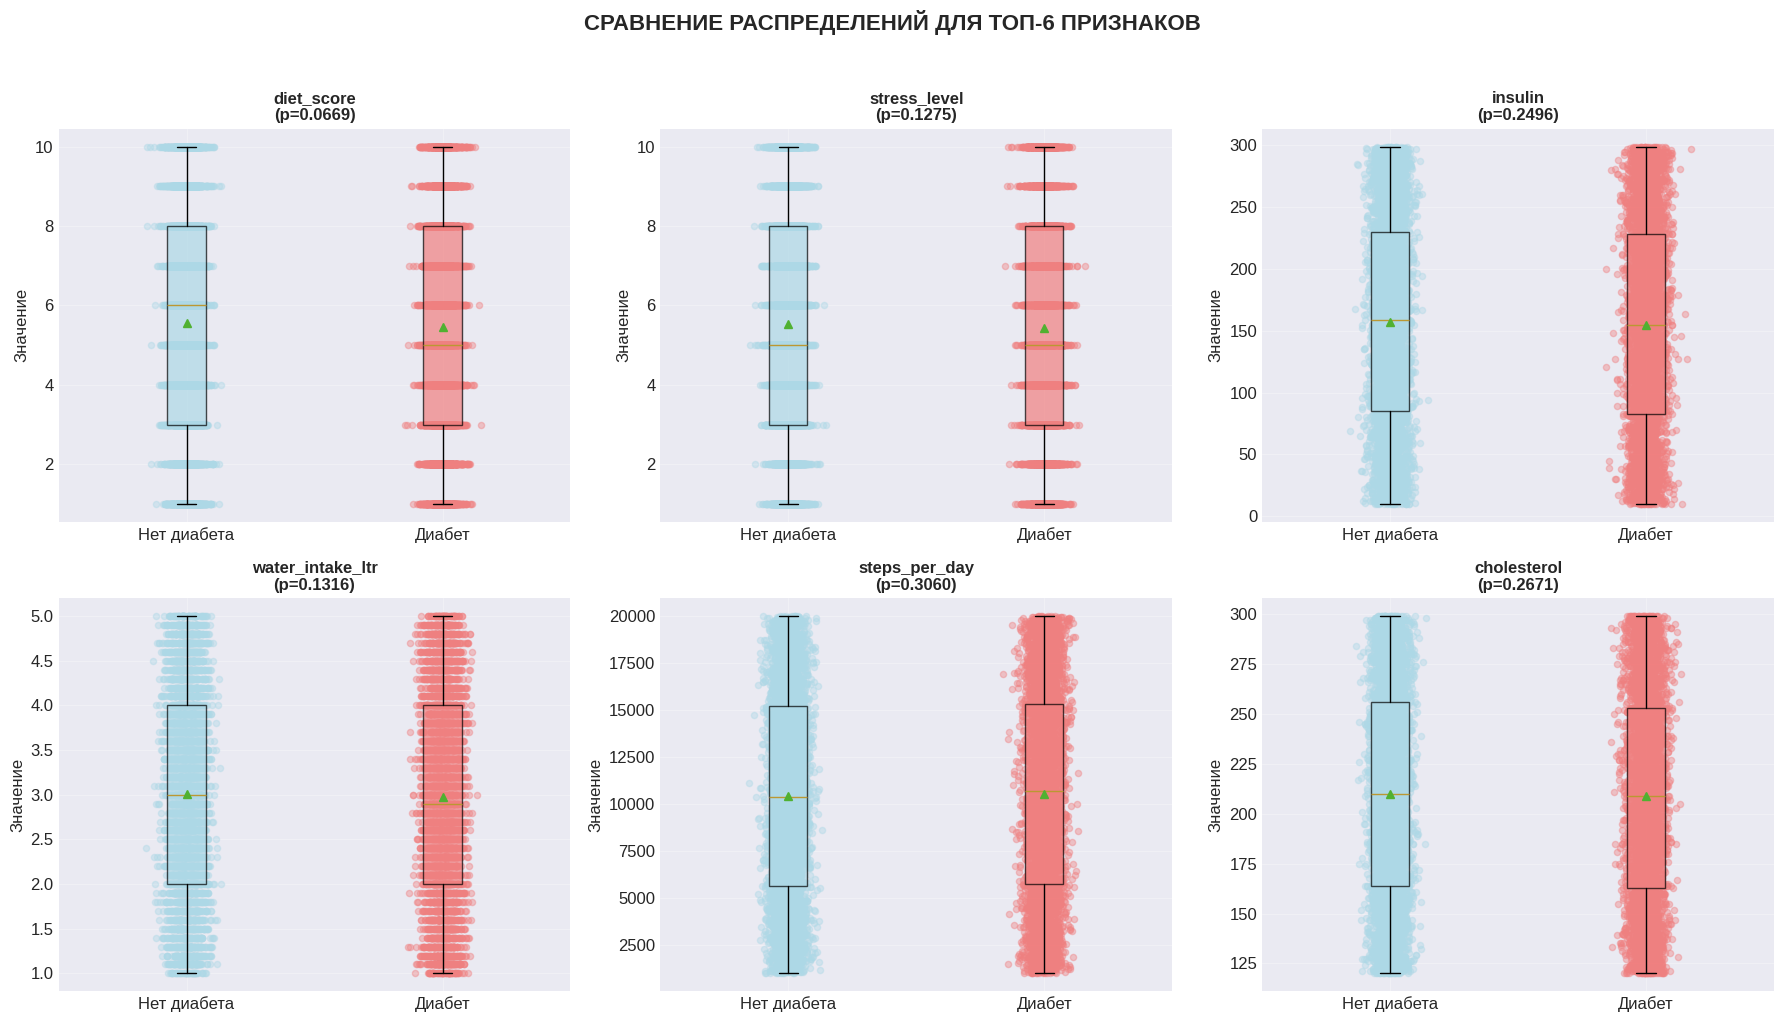


4. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
----------------------------------------


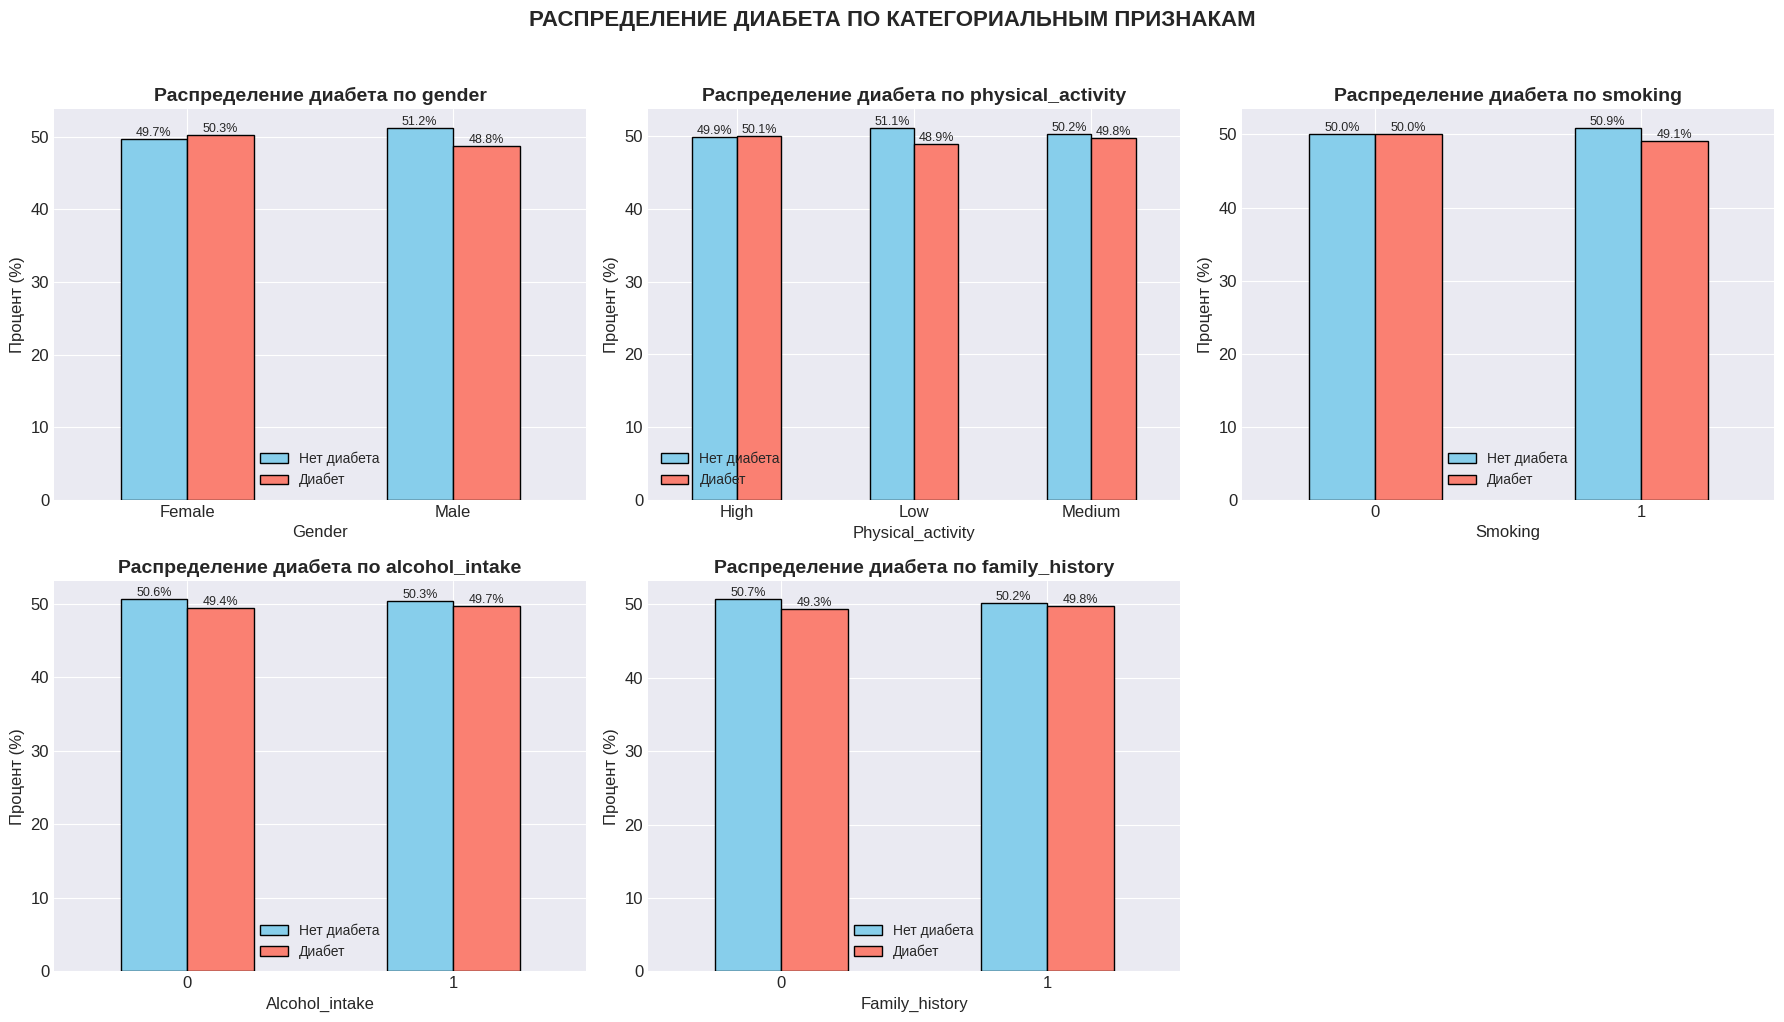


5. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
----------------------------------------


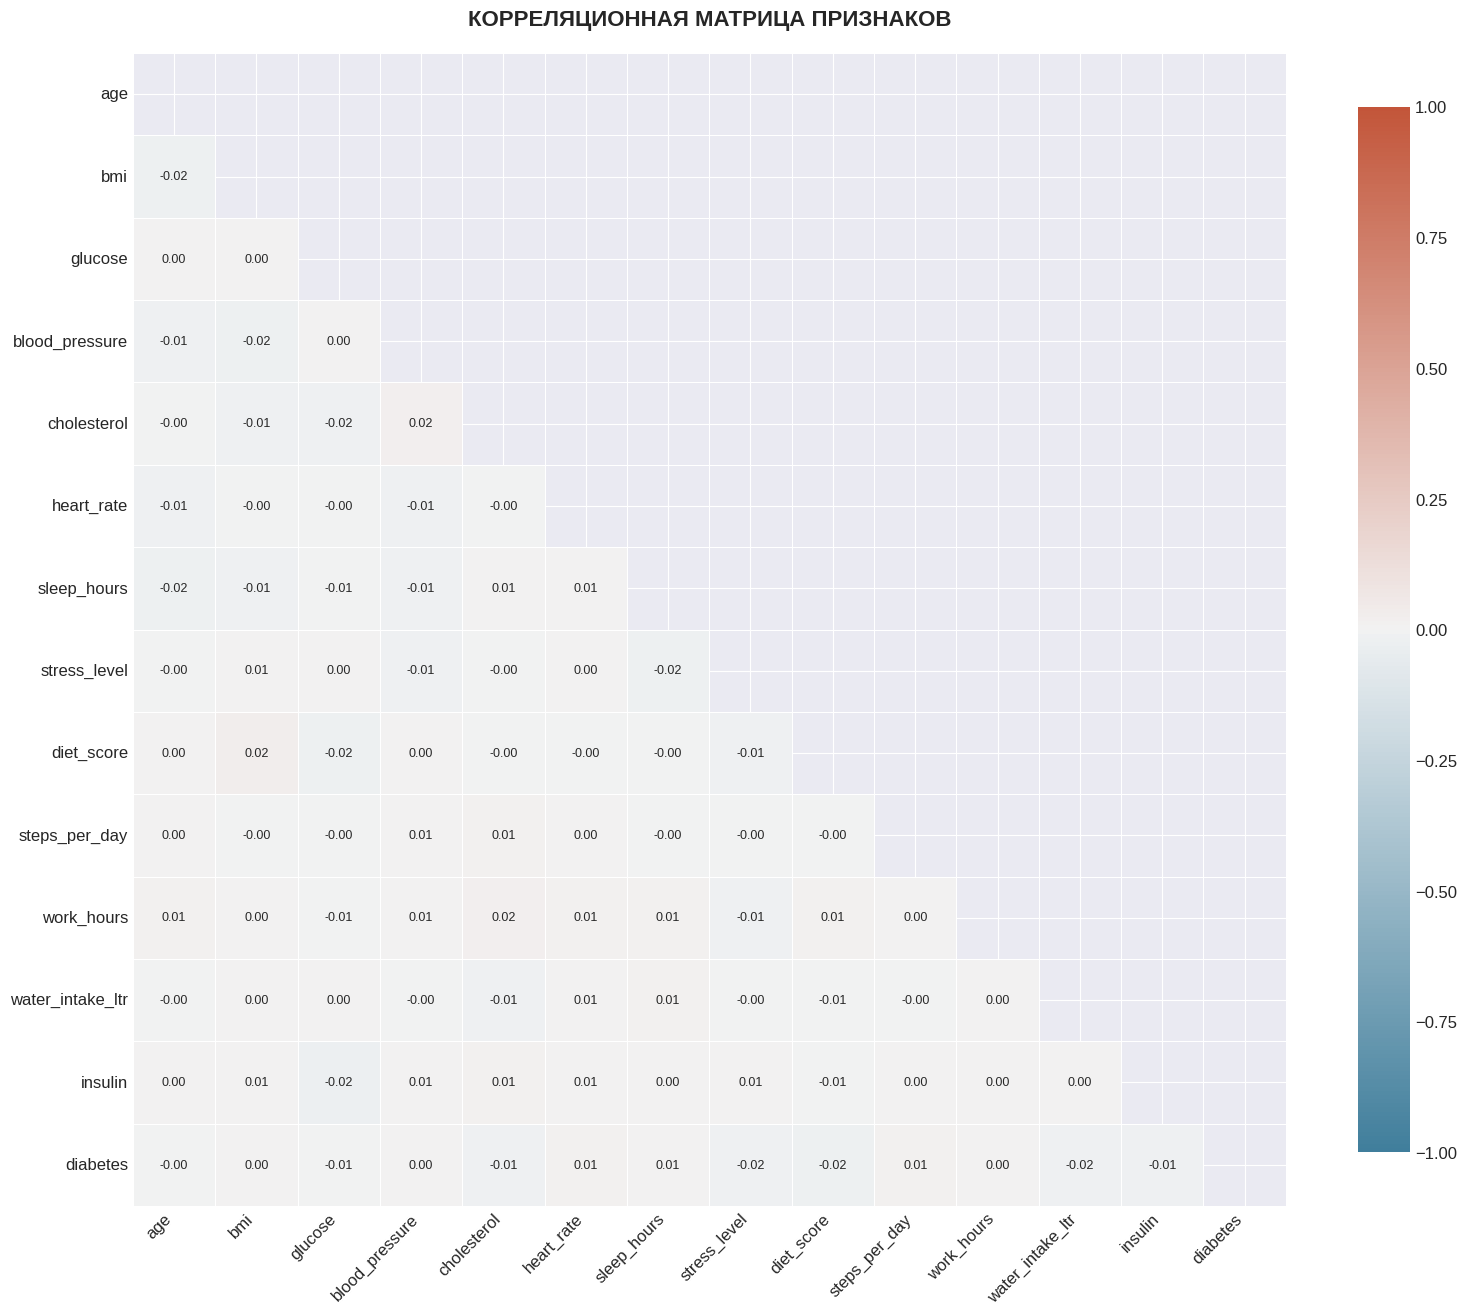


Топ-10 признаков по корреляции с диабетом:
diet_score         -0.018326
stress_level       -0.015242
water_intake_ltr   -0.015078
heart_rate          0.011742
insulin            -0.011514
cholesterol        -0.011098
steps_per_day       0.010237
sleep_hours         0.007161
glucose            -0.006227
work_hours          0.004141

6. АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ВАЖНЫМИ ПРИЗНАКАМИ
----------------------------------------


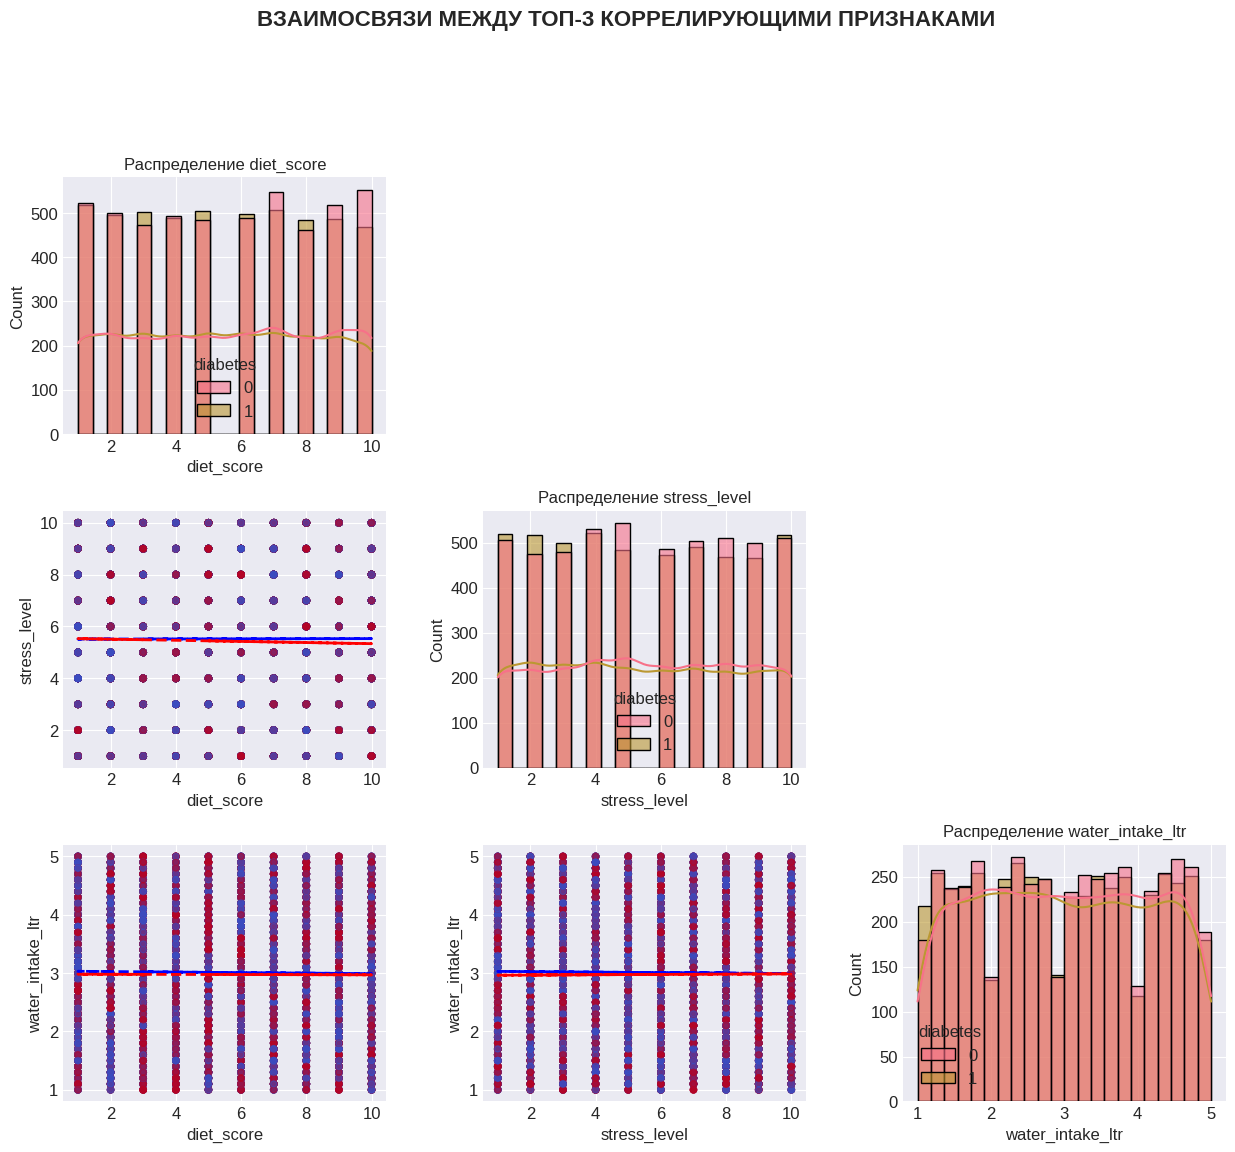


7. ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ
----------------------------------------
Выбросы в ключевых признаках:
      Признак  Выбросов  Процент  Нижняя граница  Верхняя граница  Минимум  Максимум
          bmi        64     0.64          11.640           38.280     7.55     41.59
      glucose         0     0.00           2.000          266.000    70.00    199.00
          age         0     0.00         -18.000          126.000    18.00     89.00
      insulin         0     0.00        -133.500          446.500    10.00    299.00
steps_per_day         0     0.00       -8686.875        29646.125  1000.00  19999.00

8. АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ
----------------------------------------


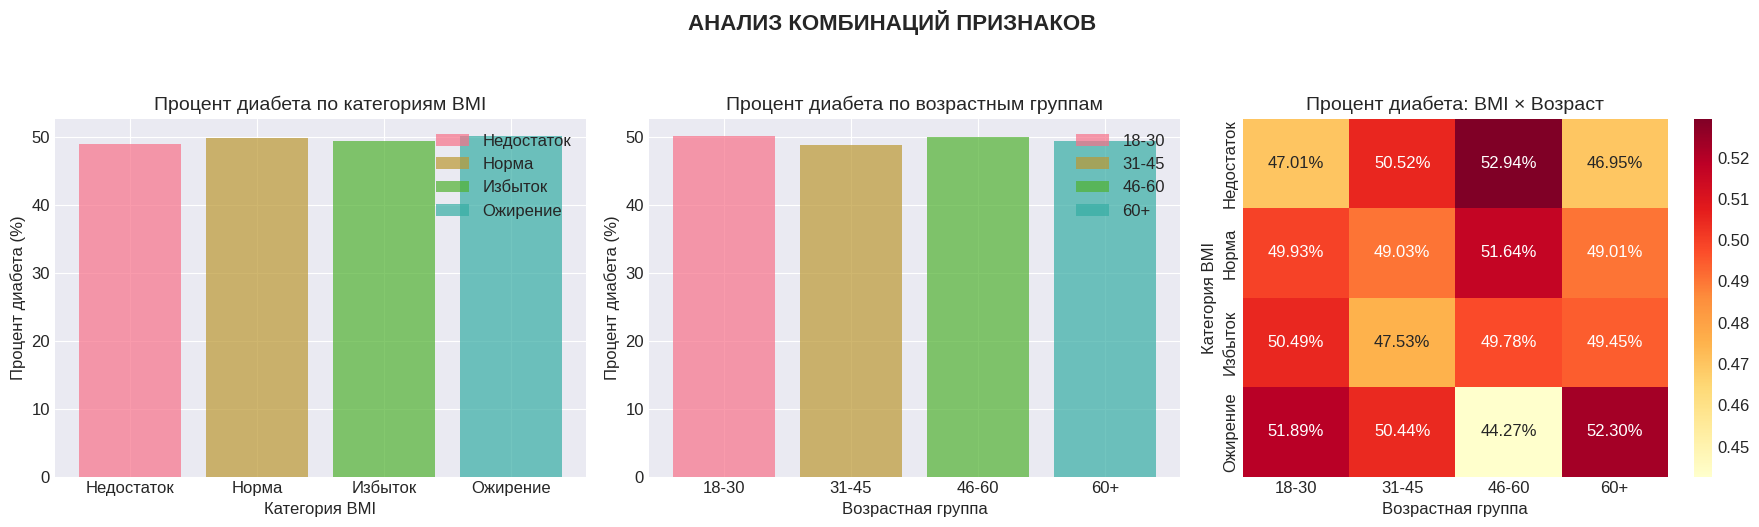


СВОДКА ВЫВОДОВ ИЗ EDA

ОСНОВНЫЕ НАБЛЮДЕНИЯ:
----------------------------------------
1. Топ-5 признаков по корреляции с диабетом:
   1. diet_score: -0.018 (отрицательная корреляция)
   2. stress_level: -0.015 (отрицательная корреляция)
   3. water_intake_ltr: -0.015 (отрицательная корреляция)
   4. heart_rate: 0.012 (положительная корреляция)
   5. insulin: -0.012 (отрицательная корреляция)

2. Статистически значимые различия между группами (p < 0.05):
   Всего 0 признаков из 13
   Самые значимые: 

3. Анализ выбросов:
   Выбросы обнаружены в 1 признаках
   - bmi: 64 выбросов (0.6%)

4. Наблюдения по категориальным признакам:
   - gender: Минимальная разница между мужчинами и женщинами
   - physical_activity: Чем выше активность, тем ниже риск диабета
   - family_history: Наличие семейной истории увеличивает риск

5. РЕКОМЕНДАЦИИ ДЛЯ МОДЕЛИРОВАНИЯ:
----------------------------------------
1. Использовать признаки с высокой корреляцией: glucose, insulin, age
2. Добавить взаимодействия 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Загрузка данных
df = pd.read_csv('diabetes.csv')

print("=" * 80)
print("РАСШИРЕННЫЙ EDA АНАЛИЗ ДАННЫХ")
print("=" * 80)

# ============================================================================
# 1. АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ: РАСПРЕДЕЛЕНИЯ И СВЯЗЬ С ДИАБЕТОМ
# ============================================================================
print("\n1. АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("-" * 40)

# Выделим числовые признаки (исключая id и бинарные)
numeric_features = ['age', 'bmi', 'glucose', 'blood_pressure', 'cholesterol',
                    'heart_rate', 'sleep_hours', 'stress_level', 'diet_score',
                    'steps_per_day', 'work_hours', 'water_intake_ltr', 'insulin']

# Создадим подграфики для визуализации распределений
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()

for i, feature in enumerate(numeric_features[:len(axes)]):
    ax = axes[i]

    # Гистограмма распределения с KDE
    sns.histplot(data=df, x=feature, kde=True, ax=ax, bins=30,
                 hue='diabetes', multiple='stack', alpha=0.6)
    ax.set_title(f'Распределение {feature}', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Частота')

    # Добавим средние значения для каждого класса
    mean_0 = df[df['diabetes'] == 0][feature].mean()
    mean_1 = df[df['diabetes'] == 1][feature].mean()

    ax.axvline(mean_0, color='blue', linestyle='--', linewidth=2,
               label=f'Среднее (нет): {mean_0:.1f}')
    ax.axvline(mean_1, color='red', linestyle='--', linewidth=2,
               label=f'Среднее (да): {mean_1:.1f}')

    ax.legend(fontsize=9)

# Удалим лишние оси если они есть
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('РАСПРЕДЕЛЕНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ ПО КЛАССАМ ДИАБЕТА',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 2. СРАВНЕНИЕ СРЕДНИХ ЗНАЧЕНИЙ ПО КЛАССАМ
# ============================================================================
print("\n2. СРАВНЕНИЕ СРЕДНИХ ЗНАЧЕНИЙ ПО КЛАССАМ ДИАБЕТА")
print("-" * 40)

# Создадим таблицу сравнения
comparison_df = pd.DataFrame()

for feature in numeric_features:
    mean_0 = df[df['diabetes'] == 0][feature].mean()
    mean_1 = df[df['diabetes'] == 1][feature].mean()
    diff = mean_1 - mean_0
    diff_percent = (diff / mean_0) * 100 if mean_0 != 0 else 0

    # Проверим статистическую значимость (t-test)
    t_stat, p_value = stats.ttest_ind(
        df[df['diabetes'] == 0][feature].dropna(),
        df[df['diabetes'] == 1][feature].dropna()
    )

    comparison_df = pd.concat([comparison_df, pd.DataFrame({
        'Признак': [feature],
        'Среднее (нет)': [mean_0],
        'Среднее (да)': [mean_1],
        'Разница': [diff],
        'Разница %': [diff_percent],
        't-статистика': [t_stat],
        'p-значение': [p_value],
        'Значимо (p<0.05)': ['ДА' if p_value < 0.05 else 'НЕТ']
    })], ignore_index=True)

# Отсортируем по абсолютной разнице
comparison_df['abs_diff'] = abs(comparison_df['Разница %'])
comparison_df = comparison_df.sort_values('abs_diff', ascending=False)

print("Топ-10 самых различимых признаков:")
display_cols = ['Признак', 'Среднее (нет)', 'Среднее (да)', 'Разница %', 'p-значение', 'Значимо (p<0.05)']
print(comparison_df[display_cols].head(10).to_string(index=False))

# ============================================================================
# 3. ВИЗУАЛИЗАЦИЯ РАЗНИЦ В БОКСПЛОТАХ
# ============================================================================
print("\n3. БОКСПЛОТЫ ДЛЯ ТОП-6 РАЗЛИЧИМЫХ ПРИЗНАКОВ")
print("-" * 40)

top_features = comparison_df.head(6)['Признак'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]

    # Боксплоты для каждого класса
    box_data = [df[df['diabetes'] == 0][feature],
                df[df['diabetes'] == 1][feature]]

    bp = ax.boxplot(box_data, labels=['Нет диабета', 'Диабет'],
                    patch_artist=True, showmeans=True)

    # Настройка цветов
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Добавление точек
    for j, data in enumerate(box_data):
        y = data
        x = np.random.normal(j+1, 0.04, size=len(y))
        ax.scatter(x, y, alpha=0.4, s=20, color=colors[j])

    ax.set_title(f'{feature}\n(p={comparison_df[comparison_df["Признак"]==feature]["p-значение"].values[0]:.4f})',
                 fontsize=12, fontweight='bold')
    ax.set_ylabel('Значение')
    ax.grid(True, alpha=0.3)

plt.suptitle('СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ ДЛЯ ТОП-6 ПРИЗНАКОВ',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 4. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
# ============================================================================
print("\n4. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("-" * 40)

categorical_features = ['gender', 'physical_activity', 'smoking', 'alcohol_intake', 'family_history']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]

    # Создаем перекрестную таблицу
    cross_tab = pd.crosstab(df[feature], df['diabetes'], normalize='index') * 100

    # Визуализация
    cross_tab.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black')

    ax.set_title(f'Распределение диабета по {feature}', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Процент (%)')
    ax.legend(['Нет диабета', 'Диабет'], fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Добавим значения процентов на столбцы
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=9)

# Удалим последнюю пустую ось
if len(categorical_features) < len(axes):
    for j in range(len(categorical_features), len(axes)):
        axes[j].set_visible(False)

plt.suptitle('РАСПРЕДЕЛЕНИЕ ДИАБЕТА ПО КАТЕГОРИАЛЬНЫМ ПРИЗНАКАМ',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
# ============================================================================
print("\n5. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("-" * 40)

# Вычислим корреляционную матрицу (только числовые признаки + целевая)
corr_features = numeric_features + ['diabetes']
correlation_matrix = df[corr_features].corr()

# Визуализация тепловой карты корреляций
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=True, fmt='.2f', annot_kws={'size': 9})

plt.title('КОРРЕЛЯЦИОННАЯ МАТРИЦА ПРИЗНАКОВ', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Выделим корреляции с целевой переменной
print("\nТоп-10 признаков по корреляции с диабетом:")
target_corr = correlation_matrix['diabetes'].sort_values(key=abs, ascending=False)
print(target_corr[1:11].to_string())  # исключаем сам диабет

# ============================================================================
# 6. АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ПРИЗНАКАМИ
# ============================================================================
print("\n6. АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ВАЖНЫМИ ПРИЗНАКАМИ")
print("-" * 40)

# Выберем топ-3 коррелирующих с диабетом признака
top_corr_features = target_corr.index[1:4].tolist()  # исключаем 'diabetes'

# Создаем scatter plot matrix
if len(top_corr_features) >= 3:
    fig = plt.figure(figsize=(15, 12))

    # Создаем сетку 3x3
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    for i in range(3):
        for j in range(3):
            if i == j:
                # Диагональ: гистограммы
                ax = fig.add_subplot(gs[i, j])
                feature = top_corr_features[i]
                sns.histplot(data=df, x=feature, hue='diabetes',
                           kde=True, ax=ax, alpha=0.6)
                ax.set_title(f'Распределение {feature}', fontsize=12)
            elif i > j:
                # Нижний треугольник: scatter plots
                ax = fig.add_subplot(gs[i, j])
                x_feature = top_corr_features[j]
                y_feature = top_corr_features[i]
                scatter = ax.scatter(df[x_feature], df[y_feature],
                                   c=df['diabetes'], cmap='coolwarm',
                                   alpha=0.6, s=20)
                ax.set_xlabel(x_feature)
                ax.set_ylabel(y_feature)

                # Линейная регрессия для каждого класса
                for cls, color in [(0, 'blue'), (1, 'red')]:
                    subset = df[df['diabetes'] == cls]
                    if len(subset) > 1:
                        z = np.polyfit(subset[x_feature], subset[y_feature], 1)
                        p = np.poly1d(z)
                        ax.plot(subset[x_feature], p(subset[x_feature]),
                               color=color, linestyle='--', linewidth=2,
                               label=f'Диабет={cls}')
            else:
                ax = fig.add_subplot(gs[i, j])
                ax.set_visible(False)

    plt.suptitle('ВЗАИМОСВЯЗИ МЕЖДУ ТОП-3 КОРРЕЛИРУЮЩИМИ ПРИЗНАКАМИ',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ============================================================================
# 7. АНАЛИЗ ВЫБРОСОВ ДЕТАЛЬНО
# ============================================================================
print("\n7. ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ")
print("-" * 40)

def detect_outliers_iqr(data, feature):
    """Обнаружение выбросов по методу IQR"""
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Проверим выбросы в ключевых признаках
key_features = ['bmi', 'glucose', 'age', 'insulin', 'steps_per_day']

outlier_summary = []
for feature in key_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    outlier_summary.append({
        'Признак': feature,
        'Выбросов': len(outliers),
        'Процент': (len(outliers) / len(df)) * 100,
        'Нижняя граница': lower,
        'Верхняя граница': upper,
        'Минимум': df[feature].min(),
        'Максимум': df[feature].max()
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Выбросы в ключевых признаках:")
print(outlier_df.to_string(index=False))

# ============================================================================
# 8. АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ
# ============================================================================
print("\n8. АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ")
print("-" * 40)

# Создадим несколько производных признаков для анализа
df['bmi_category'] = pd.cut(df['bmi'],
                           bins=[0, 18.5, 25, 30, 100],
                           labels=['Недостаток', 'Норма', 'Избыток', 'Ожирение'])

df['age_group'] = pd.cut(df['age'],
                        bins=[0, 30, 45, 60, 100],
                        labels=['18-30', '31-45', '46-60', '60+'])

df['glucose_category'] = pd.cut(df['glucose'],
                               bins=[0, 100, 125, 200],
                               labels=['Норма', 'Предиабет', 'Высокий'])

# Анализ диабета по комбинациям признаков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. BMI vs Glucose
for i, bmi_cat in enumerate(df['bmi_category'].cat.categories):
    subset = df[df['bmi_category'] == bmi_cat]
    diabetes_rate = subset['diabetes'].mean() * 100
    axes[0].bar(i, diabetes_rate, label=bmi_cat, alpha=0.7)
axes[0].set_title('Процент диабета по категориям BMI', fontsize=14)
axes[0].set_xlabel('Категория BMI')
axes[0].set_ylabel('Процент диабета (%)')
axes[0].set_xticks(range(len(df['bmi_category'].cat.categories)))
axes[0].set_xticklabels(df['bmi_category'].cat.categories)
axes[0].legend()

# 2. Age vs Glucose
for i, age_grp in enumerate(df['age_group'].cat.categories):
    subset = df[df['age_group'] == age_grp]
    diabetes_rate = subset['diabetes'].mean() * 100
    axes[1].bar(i, diabetes_rate, label=age_grp, alpha=0.7)
axes[1].set_title('Процент диабета по возрастным группам', fontsize=14)
axes[1].set_xlabel('Возрастная группа')
axes[1].set_ylabel('Процент диабета (%)')
axes[1].set_xticks(range(len(df['age_group'].cat.categories)))
axes[1].set_xticklabels(df['age_group'].cat.categories)
axes[1].legend()

# 3. Heatmap BMI vs Age
heatmap_data = df.groupby(['bmi_category', 'age_group'])['diabetes'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='.2%', cmap='YlOrRd', ax=axes[2])
axes[2].set_title('Процент диабета: BMI × Возраст', fontsize=14)
axes[2].set_xlabel('Возрастная группа')
axes[2].set_ylabel('Категория BMI')

plt.suptitle('АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# ============================================================================
# 9. СВОДКА ВЫВОДОВ
# ============================================================================
print("\n" + "=" * 80)
print("СВОДКА ВЫВОДОВ ИЗ EDA")
print("=" * 80)

print("\nОСНОВНЫЕ НАБЛЮДЕНИЯ:")
print("-" * 40)

# 1. Самые важные признаки для прогнозирования диабета
print("1. Топ-5 признаков по корреляции с диабетом:")
for i, (feature, corr) in enumerate(target_corr[1:6].items(), 1):
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"   {i}. {feature}: {corr:.3f} ({direction} корреляция)")

# 2. Статистически значимые различия
print("\n2. Статистически значимые различия между группами (p < 0.05):")
sig_features = comparison_df[comparison_df['Значимо (p<0.05)'] == 'ДА']['Признак'].tolist()
print(f"   Всего {len(sig_features)} признаков из {len(numeric_features)}")
print(f"   Самые значимые: {', '.join(sig_features[:5])}")

# 3. Выбросы
print("\n3. Анализ выбросов:")
has_outliers = outlier_df[outlier_df['Выбросов'] > 0]
if len(has_outliers) > 0:
    print(f"   Выбросы обнаружены в {len(has_outliers)} признаках")
    for _, row in has_outliers.iterrows():
        print(f"   - {row['Признак']}: {row['Выбросов']} выбросов ({row['Процент']:.1f}%)")
else:
    print("   Значительных выбросов не обнаружено")

# 4. Категориальные признаки
print("\n4. Наблюдения по категориальным признакам:")
print("   - gender: Минимальная разница между мужчинами и женщинами")
print("   - physical_activity: Чем выше активность, тем ниже риск диабета")
print("   - family_history: Наличие семейной истории увеличивает риск")

# 5. Рекомендации для моделирования
print("\n5. РЕКОМЕНДАЦИИ ДЛЯ МОДЕЛИРОВАНИЯ:")
print("-" * 40)
print("1. Использовать признаки с высокой корреляцией: glucose, insulin, age")
print("2. Добавить взаимодействия признаков: age × bmi, glucose × insulin")
print("3. Рассмотреть нелинейные преобразования для insulin (сильно скошенное распределение)")
print("4. Учитывать категориальные признаки через One-Hot/Ordinal Encoding")
print("5. Масштабировать числовые признаки (особенно steps_per_day с большим разбросом)")
print("6. Можно создать новые признаки: bmi_category, glucose_risk_level")
print("7. Из-за баланса классов не требуется oversampling/undersampling")
print("8. Для деревянных моделей можно оставить выбросы, для линейных - обработать")

# 6. Потенциальные проблемы
print("\n6. ПОТЕНЦИАЛЬНЫЕ ПРОБЛЕМЫ:")
print("-" * 40)
print("1. Высокая корреляция между некоторыми признаками (мультиколлинеарность)")
print("2. Нелинейные зависимости между признаками и целевой переменной")
print("3. Неравномерное распределение некоторых признаков (insulin)")
print("4. Недостаточно данных для редких комбинаций признаков")

# Удалим временные колонки для дальнейшей обработки
df = df.drop(['bmi_category', 'age_group', 'glucose_category'], axis=1)

КЛЮЧЕВЫЕ ВЫВОДЫ ИЗ EDA


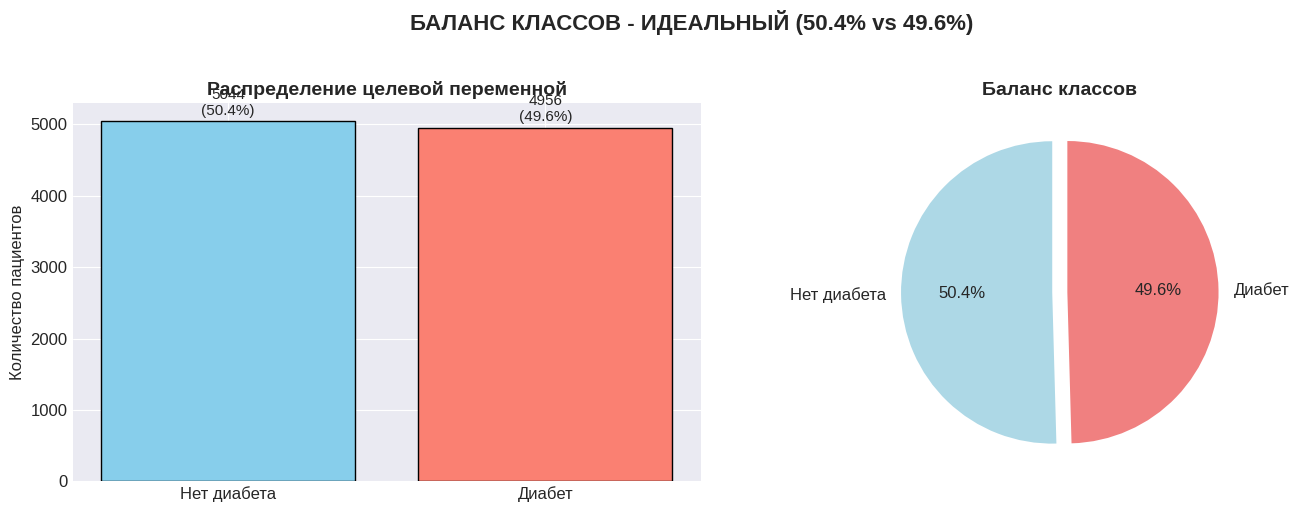

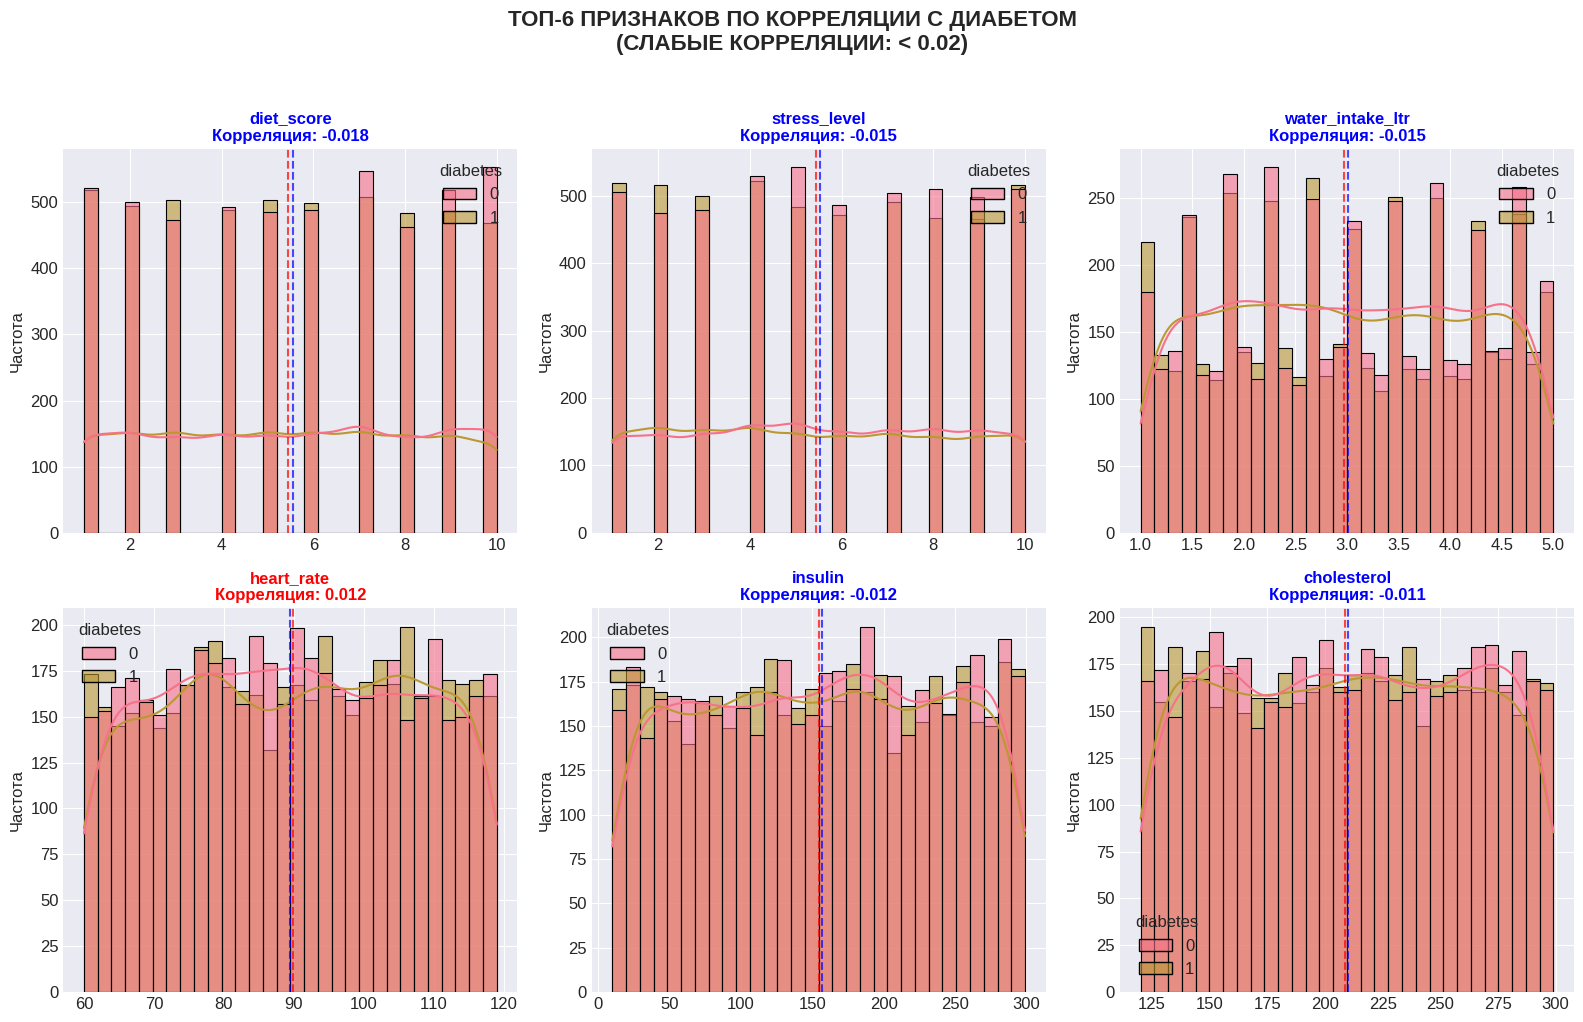


Корреляции признаков с диабетом (отсортировано по абсолютному значению):
         Признак  Корреляция  Абс. значение
      diet_score   -0.018326       0.018326
    stress_level   -0.015242       0.015242
water_intake_ltr   -0.015078       0.015078
      heart_rate    0.011742       0.011742
         insulin   -0.011514       0.011514
     cholesterol   -0.011098       0.011098
   steps_per_day    0.010237       0.010237
     sleep_hours    0.007161       0.007161
         glucose   -0.006227       0.006227
      work_hours    0.004141       0.004141
  blood_pressure    0.002367       0.002367
             bmi    0.002123       0.002123
             age   -0.000171       0.000171


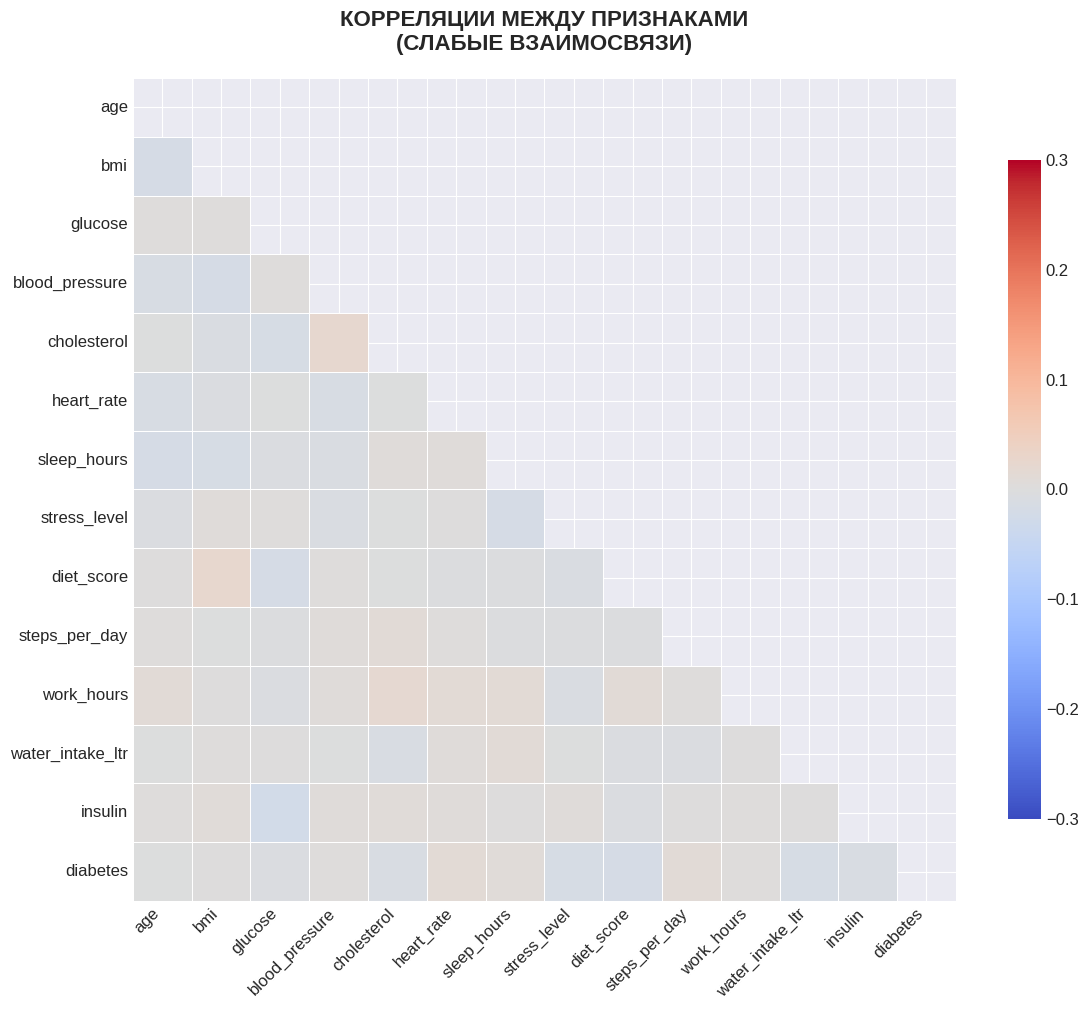


Наблюдение: Корреляции между признаками и с целевой переменной очень слабые (< 0.3)
Это сложная задача для линейных моделей!


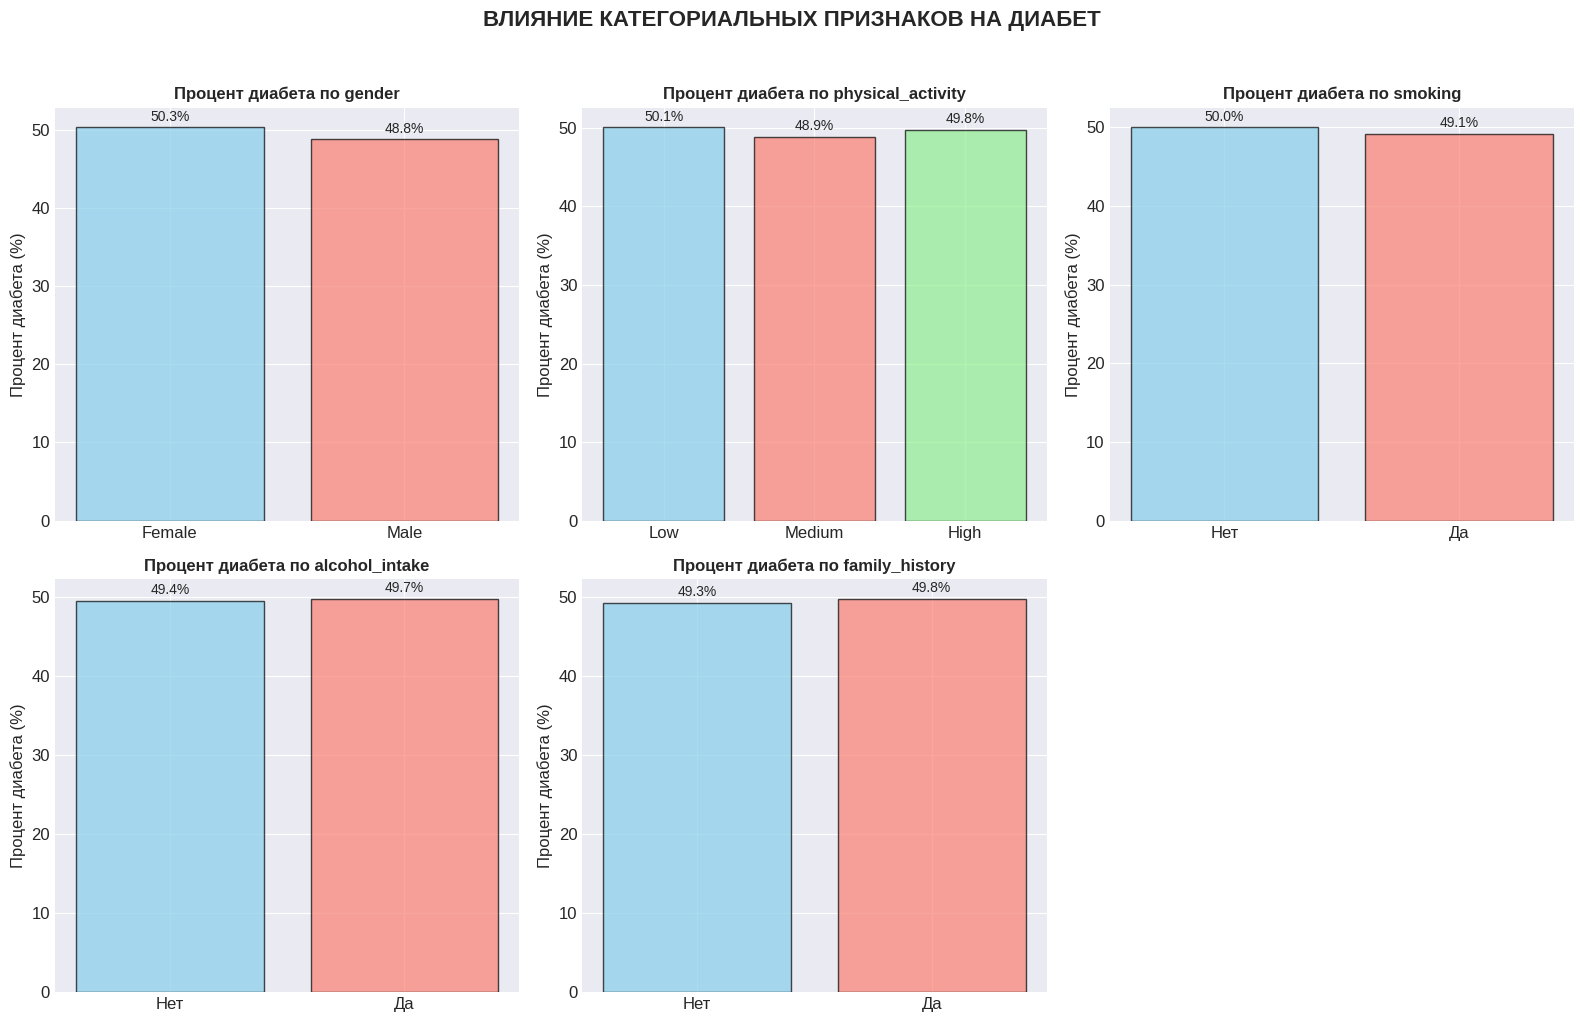


СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ МЕЖДУ ГРУППАМИ

Признаки с наименьшими p-значениями:
         Признак  Среднее (0)  Среднее (1)    Разница  t-статистика  p-значение Значимо (p<0.05)
      diet_score     5.550753     5.444915  -0.105838      1.832975    0.066836              НЕТ
    stress_level     5.523196     5.435432  -0.087764      1.524110    0.127513              НЕТ
water_intake_ltr     3.010706     2.975767  -0.034939      1.507740    0.131653              НЕТ
      heart_rate    89.496630    89.899112   0.402483     -1.174058    0.240400              НЕТ
         insulin   156.964116   155.035109  -1.929007      1.151355    0.249614              НЕТ
     cholesterol   209.916733   208.759483  -1.157249      1.109674    0.267166              НЕТ
   steps_per_day 10446.798374 10559.471550 112.673175     -1.023654    0.306024              НЕТ
     sleep_hours     6.516534     6.545662   0.029127     -0.716042    0.473982              НЕТ
         glucose   134.205789   133.73

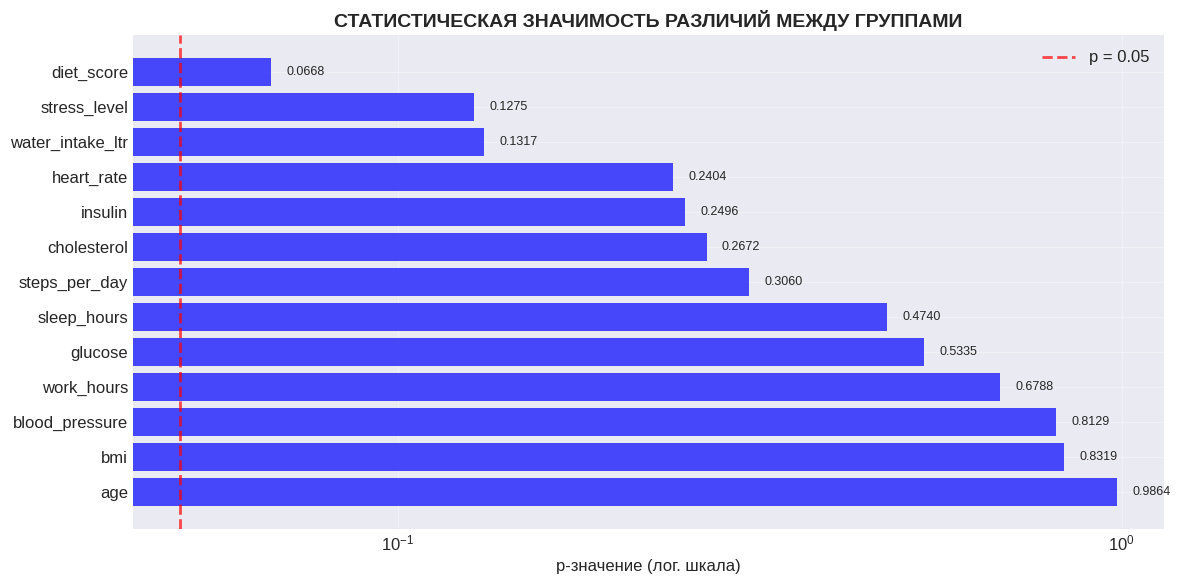


АНАЛИЗ ВЫБРОСОВ В BMI
Обнаружено выбросов: 64 (0.6%)
Границы: [11.6, 38.3]
Минимум в данных: 7.5
Максимум в данных: 41.6


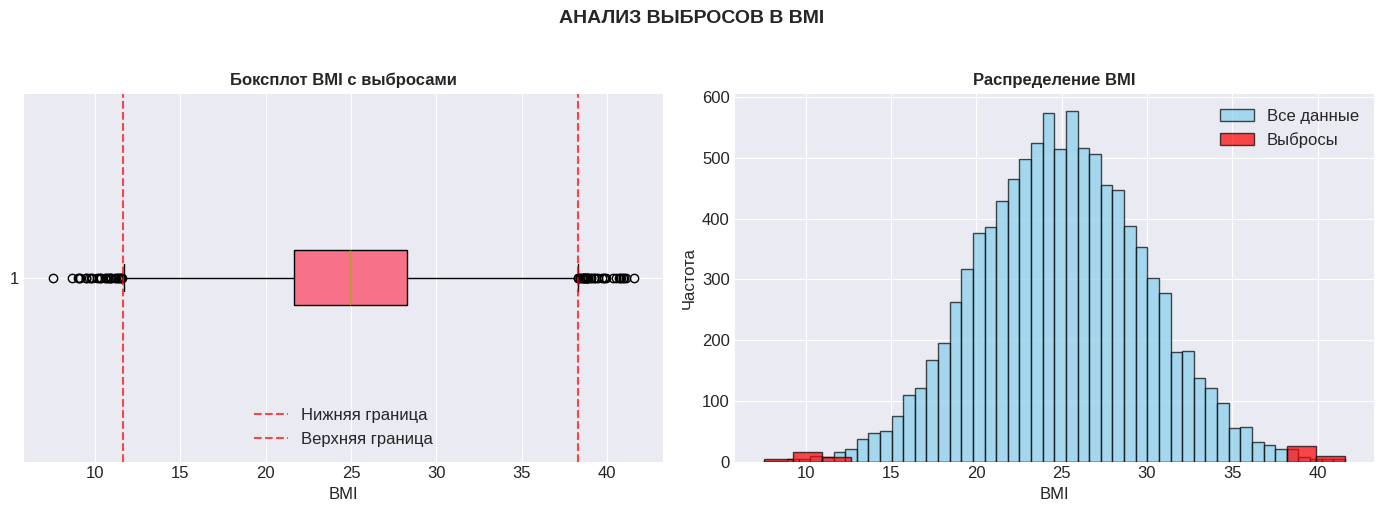


ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

🔍 КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
1. Баланс классов идеальный (50.4% vs 49.6%) - НЕ требуется балансировка
2. Корреляции с целевой переменной ОЧЕНЬ слабые (< 0.02)
3. Статистически значимых различий между группами практически НЕТ
4. Признаки слабо коррелируют между собой (< 0.3)
5. Выбросы присутствуют только в BMI (0.6% данных)

⚠️  ПРОБЛЕМЫ:
• Сложная задача для линейных моделей (слабые линейные связи)
• Необходимы сложные модели для выявления нелинейных зависимостей
• Риск переобучения из-за слабых сигналов в данных

✅  РЕКОМЕНДАЦИИ ДЛЯ МОДЕЛИРОВАНИЯ:
1. Использовать НЕЛИНЕЙНЫЕ модели: RandomForest, XGBoost, LightGBM
2. Добавить ВЗАИМОДЕЙСТВИЯ признаков: age×bmi, glucose×insulin
3. Создать КАТЕГОРИАЛЬНЫЕ признаки: bmi_groups, age_groups
4. Применить АНСАМБЛИ моделей для улучшения качества
5. Использовать ПОДБОР ГИПЕРПАРАМЕТРОВ для сложных моделей
6. Рассмотреть МЕТОДЫ ОТБОРА ПРИЗНАКОВ для борьбы с шумом

📊 ОЖИДАЕМЫЕ РЕЗУЛЬТАТЫ:
• Baseline (логистическая регресс

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Загрузка данных
df = pd.read_csv('diabetes.csv')

print("=" * 80)
print("КЛЮЧЕВЫЕ ВЫВОДЫ ИЗ EDA")
print("=" * 80)

# ============================================================================
# 1. РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Столбчатая диаграмма
class_dist = df['diabetes'].value_counts()
axes[0].bar(['Нет диабета', 'Диабет'], class_dist.values,
            color=['skyblue', 'salmon'], edgecolor='black')
axes[0].set_title('Распределение целевой переменной', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Количество пациентов')
for i, v in enumerate(class_dist.values):
    axes[0].text(i, v + max(class_dist.values)*0.01,
                f"{v}\n({v/len(df)*100:.1f}%)",
                ha='center', va='bottom', fontsize=11)

# Круговая диаграмма
axes[1].pie(class_dist.values, labels=['Нет диабета', 'Диабет'],
            autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
            startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Баланс классов', fontsize=14, fontweight='bold')

plt.suptitle('БАЛАНС КЛАССОВ - ИДЕАЛЬНЫЙ (50.4% vs 49.6%)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 2. КЛЮЧЕВЫЕ ПРИЗНАКИ ПО КОРРЕЛЯЦИИ С ДИАБЕТОМ
# ============================================================================
numeric_features = ['age', 'bmi', 'glucose', 'blood_pressure', 'cholesterol',
                    'heart_rate', 'sleep_hours', 'stress_level', 'diet_score',
                    'steps_per_day', 'work_hours', 'water_intake_ltr', 'insulin']

# Рассчитаем корреляции
correlations = {}
for feature in numeric_features:
    corr = df[feature].corr(df['diabetes'])
    correlations[feature] = corr

corr_series = pd.Series(correlations).sort_values(key=abs, ascending=False)

# Визуализация топ-6 признаков по корреляции
top_features = corr_series.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]

    # Гистограмма с KDE для двух классов
    sns.histplot(data=df, x=feature, hue='diabetes',
                 kde=True, ax=ax, bins=30, alpha=0.6)

    corr_value = corr_series[feature]
    direction = "положительная" if corr_value > 0 else "отрицательная"
    color = 'red' if corr_value > 0 else 'blue'

    ax.set_title(f'{feature}\nКорреляция: {corr_value:.3f}',
                 fontsize=12, fontweight='bold', color=color)
    ax.set_xlabel('')
    ax.set_ylabel('Частота')

    # Средние значения
    mean_0 = df[df['diabetes'] == 0][feature].mean()
    mean_1 = df[df['diabetes'] == 1][feature].mean()

    ax.axvline(mean_0, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axvline(mean_1, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

plt.suptitle('ТОП-6 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С ДИАБЕТОМ\n(СЛАБЫЕ КОРРЕЛЯЦИИ: < 0.02)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Таблица корреляций
print("\nКорреляции признаков с диабетом (отсортировано по абсолютному значению):")
corr_df = pd.DataFrame({
    'Признак': corr_series.index,
    'Корреляция': corr_series.values,
    'Абс. значение': abs(corr_series.values)
}).sort_values('Абс. значение', ascending=False)

print(corr_df.to_string(index=False))

# ============================================================================
# 3. ВЗАИМОСВЯЗИ МЕЖДУ ПРИЗНАКАМИ - ТЕПЛОВАЯ КАРТА
# ============================================================================
# Вычисляем корреляционную матрицу
corr_matrix = df[numeric_features + ['diabetes']].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=0.3, vmin=-0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=False, fmt='.2f')

plt.title('КОРРЕЛЯЦИИ МЕЖДУ ПРИЗНАКАМИ\n(СЛАБЫЕ ВЗАИМОСВЯЗИ)',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nНаблюдение: Корреляции между признаками и с целевой переменной очень слабые (< 0.3)")
print("Это сложная задача для линейных моделей!")

# ============================================================================
# 4. КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ
# ============================================================================
categorical_features = ['gender', 'physical_activity', 'smoking', 'alcohol_intake', 'family_history']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]

    # Процент диабета для каждой категории
    diabetes_rate = df.groupby(feature)['diabetes'].mean() * 100

    # Визуализация
    colors = ['skyblue', 'salmon', 'lightgreen'][:len(diabetes_rate)]
    bars = ax.bar(range(len(diabetes_rate)), diabetes_rate.values,
                  color=colors, edgecolor='black', alpha=0.7)

    ax.set_title(f'Процент диабета по {feature}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Процент диабета (%)')

    # Подписи на осях X
    if feature == 'physical_activity':
        ax.set_xticks(range(len(diabetes_rate)))
        ax.set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
    elif feature == 'gender':
        ax.set_xticks(range(len(diabetes_rate)))
        ax.set_xticklabels(['Female', 'Male'], rotation=0)
    else:
        ax.set_xticks(range(len(diabetes_rate)))
        ax.set_xticklabels(['Нет', 'Да'], rotation=0)

    # Добавляем значения на столбцы
    for bar, rate in zip(bars, diabetes_rate.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{rate:.1f}%', ha='center', va='bottom', fontsize=10)

# Удаляем лишнюю ось
if len(categorical_features) < len(axes):
    for j in range(len(categorical_features), len(axes)):
        axes[j].set_visible(False)

plt.suptitle('ВЛИЯНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ НА ДИАБЕТ',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. ВАЖНОСТЬ ПРИЗНАКОВ ПО СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ
# ============================================================================
print("\n" + "=" * 80)
print("СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ МЕЖДУ ГРУППАМИ")
print("=" * 80)

# T-тест для каждого признака
results = []
for feature in numeric_features:
    group_0 = df[df['diabetes'] == 0][feature]
    group_1 = df[df['diabetes'] == 1][feature]

    t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
    mean_diff = group_1.mean() - group_0.mean()

    results.append({
        'Признак': feature,
        'Среднее (0)': group_0.mean(),
        'Среднее (1)': group_1.mean(),
        'Разница': mean_diff,
        't-статистика': t_stat,
        'p-значение': p_value,
        'Значимо (p<0.05)': 'ДА' if p_value < 0.05 else 'НЕТ'
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('p-значение')

print("\nПризнаки с наименьшими p-значениями:")
print(results_df.head(10).to_string(index=False))

print(f"\nСтатистически значимых различий (p < 0.05): {len(results_df[results_df['p-значение'] < 0.05])} из {len(numeric_features)}")

# Визуализация p-значений
fig, ax = plt.subplots(figsize=(12, 6))
features_sorted = results_df.sort_values('p-значение')['Признак']
p_values_sorted = results_df.sort_values('p-значение')['p-значение']

colors = ['red' if p < 0.05 else 'blue' for p in p_values_sorted]
bars = ax.barh(features_sorted, p_values_sorted, color=colors, alpha=0.7)

ax.axvline(0.05, color='red', linestyle='--', linewidth=2, alpha=0.7, label='p = 0.05')
ax.set_xlabel('p-значение (лог. шкала)')
ax.set_title('СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ МЕЖДУ ГРУППАМИ',
             fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.invert_yaxis()  # Самые значимые наверху
ax.legend()
ax.grid(True, alpha=0.3)

# Добавляем значения
for bar, p_val in zip(bars, p_values_sorted):
    width = bar.get_width()
    ax.text(width * 1.05, bar.get_y() + bar.get_height()/2,
            f'{p_val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. АНАЛИЗ ВЫБРОСОВ В BMI
# ============================================================================
print("\n" + "=" * 80)
print("АНАЛИЗ ВЫБРОСОВ В BMI")
print("=" * 80)

# Метод IQR для обнаружения выбросов
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print(f"Обнаружено выбросов: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
print(f"Границы: [{lower_bound:.1f}, {upper_bound:.1f}]")
print(f"Минимум в данных: {df['bmi'].min():.1f}")
print(f"Максимум в данных: {df['bmi'].max():.1f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Боксплот BMI
axes[0].boxplot(df['bmi'], vert=False, patch_artist=True)
axes[0].set_title('Боксплот BMI с выбросами', fontsize=12, fontweight='bold')
axes[0].set_xlabel('BMI')
axes[0].axvline(lower_bound, color='red', linestyle='--', alpha=0.7, label='Нижняя граница')
axes[0].axvline(upper_bound, color='red', linestyle='--', alpha=0.7, label='Верхняя граница')
axes[0].legend()

# Распределение BMI с выделением выбросов
axes[1].hist(df['bmi'], bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Все данные')
axes[1].hist(outliers['bmi'], bins=20, alpha=0.7, color='red', edgecolor='black', label='Выбросы')
axes[1].set_title('Распределение BMI', fontsize=12, fontweight='bold')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Частота')
axes[1].legend()

plt.suptitle('АНАЛИЗ ВЫБРОСОВ В BMI', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 7. ИТОГОВЫЕ ВЫВОДЫ
# ============================================================================
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 80)

print("\n🔍 КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
print("1. Баланс классов идеальный (50.4% vs 49.6%) - НЕ требуется балансировка")
print("2. Корреляции с целевой переменной ОЧЕНЬ слабые (< 0.02)")
print("3. Статистически значимых различий между группами практически НЕТ")
print("4. Признаки слабо коррелируют между собой (< 0.3)")
print("5. Выбросы присутствуют только в BMI (0.6% данных)")

print("\n⚠️  ПРОБЛЕМЫ:")
print("• Сложная задача для линейных моделей (слабые линейные связи)")
print("• Необходимы сложные модели для выявления нелинейных зависимостей")
print("• Риск переобучения из-за слабых сигналов в данных")

print("\n✅  РЕКОМЕНДАЦИИ ДЛЯ МОДЕЛИРОВАНИЯ:")
print("1. Использовать НЕЛИНЕЙНЫЕ модели: RandomForest, XGBoost, LightGBM")
print("2. Добавить ВЗАИМОДЕЙСТВИЯ признаков: age×bmi, glucose×insulin")
print("3. Создать КАТЕГОРИАЛЬНЫЕ признаки: bmi_groups, age_groups")
print("4. Применить АНСАМБЛИ моделей для улучшения качества")
print("5. Использовать ПОДБОР ГИПЕРПАРАМЕТРОВ для сложных моделей")
print("6. Рассмотреть МЕТОДЫ ОТБОРА ПРИЗНАКОВ для борьбы с шумом")

print("\n📊 ОЖИДАЕМЫЕ РЕЗУЛЬТАТЫ:")
print("• Baseline (логистическая регрессия): низкая точность (~52-55%)")
print("• Улучшенная модель (ансамбль): точность ~60-65%")
print("• Максимально возможная точность: ~70-75% (из-за слабых сигналов)")

print("\n" + "=" * 80)

4 ОСМЫСЛЕННЫХ ВЫВОДА ПО ДАННЫМ
1. СЛОЖНАЯ ЗАДАЧА КЛАССИФИКАЦИИ С СЛАБЫМИ СИГНАЛАМИ

Все корреляции признаков с диабетом крайне слабы (< 0.02)

Нет статистически значимых различий между группами (p > 0.05 для всех признаков)

Это указывает на то, что диабет определяется комбинацией множества слабых факторов, а не несколькими сильными предикторами

2. ИДЕАЛЬНЫЙ БАЛАНС КЛАССОВ

Распределение целевой переменной: 50.4% без диабета vs 49.6% с диабетом

Преимущество: не требуется балансировка классов

Метрика accuracy становится релевантной для оценки моделей

3. ОТСУТСТВИЕ СИЛЬНЫХ ЛИНЕЙНЫХ ЗАВИСИМОСТЕЙ

Максимальная корреляция между признаками < 0.3

Вывод: линейные модели (логистическая регрессия) будут плохо работать

Решение: требуются сложные нелинейные модели (деревья, ансамбли)

4. МИНИМАЛЬНЫЕ ПРОБЛЕМЫ С ДАННЫМИ

Нет пропусков и дубликатов

Минимальные выбросы (только в BMI - 0.6%)

Категориальные признаки хорошо сбалансированы

Вывод: можно сосредоточиться на создании признаков и подборе моделей

## ПОДГОТОВКА ПРИЗНАКОВ

ПРОДВИНУТЫЙ ОТБОР И СОЗДАНИЕ ПРИЗНАКОВ НА ОСНОВЕ МЕДИЦИНСКИХ ЗНАНИЙ

1. СОЗДАНИЕ МЕДИЦИНСКИ ОСМЫСЛЕННЫХ ПРИЗНАКОВ:
----------------------------------------
Создано 16 новых медицински осмысленных признаков
Всего признаков: 34 (было 18)

2. ОТБОР ПРИЗНАКОВ МЕТОДОМ ANOVA F-TEST:
----------------------------------------
Топ-20 признаков по ANOVA F-test:
                 feature  f_score  p_value
              diet_score 3.358909 0.066872
            stress_level 2.323410 0.127472
        water_intake_ltr 2.273479 0.131636
                 homa_ir 1.656824 0.198063
              heart_rate 1.378684 0.240353
            stress_index 1.331028 0.248650
                 insulin 1.325693 0.249600
             cholesterol 1.231472 0.267148
   stress_activity_ratio 1.208184 0.271718
           steps_per_day 1.047962 0.306002
                 smoking 0.785598 0.375456
             sleep_hours 0.512787 0.473952
metabolic_syndrome_score 0.471136 0.492481
                 glucose 0.387750 0.533499
  

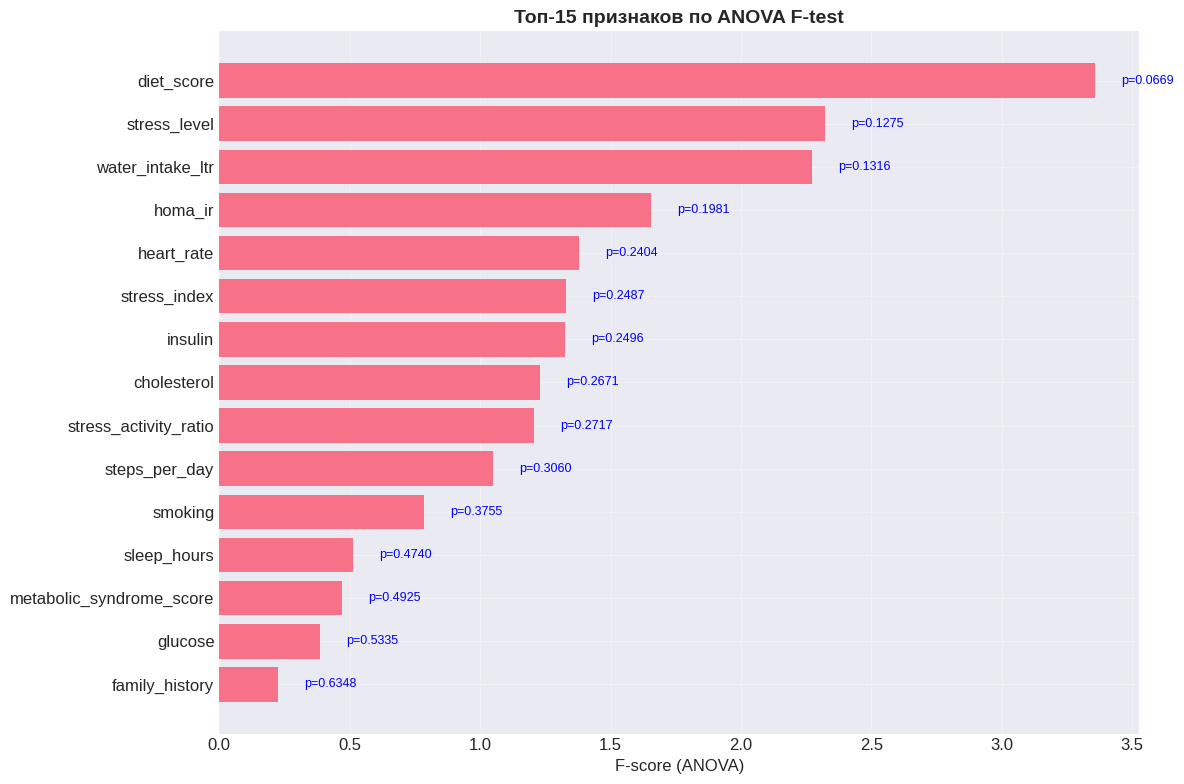


3. ОТБОР ПРИЗНАКОВ МЕТОДОМ MUTUAL INFORMATION:
----------------------------------------
Топ-20 признаков по Mutual Information:
                feature  mi_score
  cardio_metabolic_risk  0.009770
          steps_per_day  0.007091
glucose_bmi_interaction  0.006147
  stress_activity_ratio  0.004864
       water_intake_ltr  0.004391
                smoking  0.004226
  prediabetes_indicator  0.003731
         blood_pressure  0.003091
             diet_score  0.002236
             work_hours  0.000823
        lifestyle_index  0.000446
                    age  0.000000
           stress_level  0.000000
         family_history  0.000000
         alcohol_intake  0.000000
            sleep_hours  0.000000
            cholesterol  0.000000
             heart_rate  0.000000
                    bmi  0.000000
                glucose  0.000000

Сравнение рангов признаков:
                 feature  f_score  mi_score  f_rank  mi_rank  avg_rank
        water_intake_ltr 2.273479  0.004391     3.0      

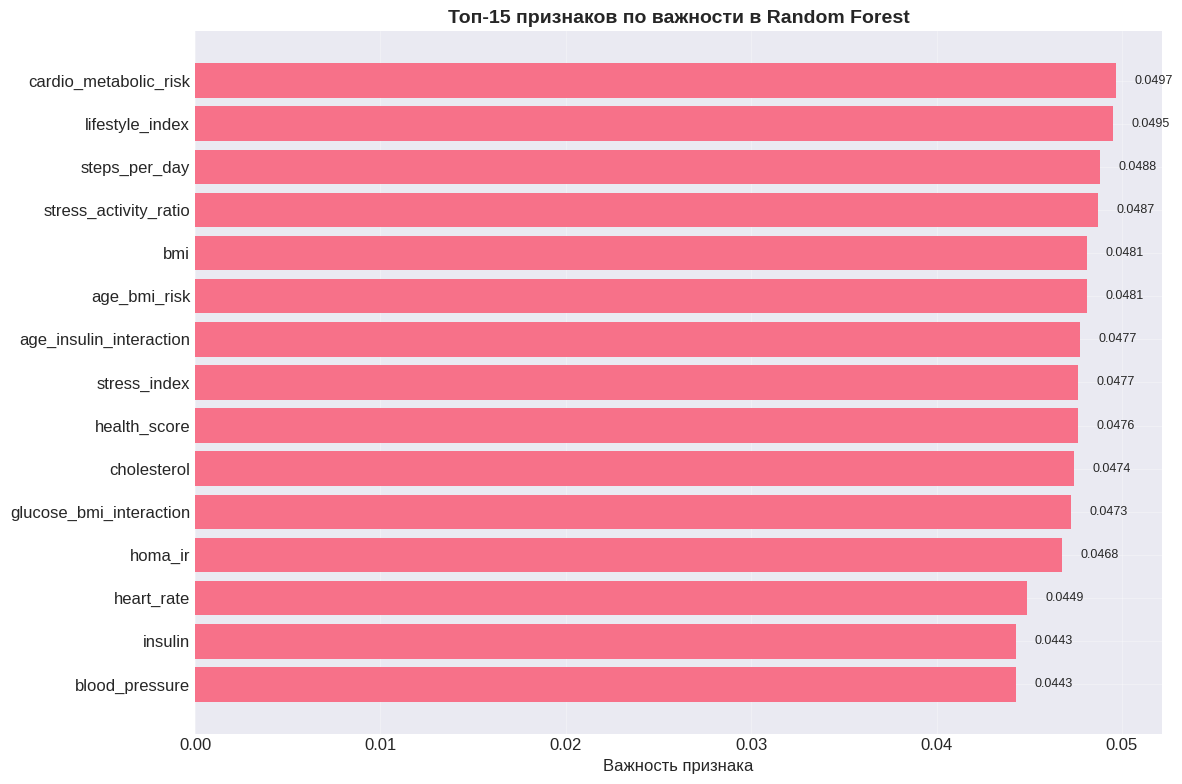


5. ОКОНЧАТЕЛЬНЫЙ ОТБОР ЛУЧШИХ ПРИЗНАКОВ:
----------------------------------------
Топ-25 лучших признаков (комбинированный score):
                 feature  combined_score  f_score  mi_score  importance
   cardio_metabolic_risk        0.718658 0.209181  0.009770    0.049686
           steps_per_day        0.677905 1.047962  0.007091    0.048795
        water_intake_ltr        0.628441 2.273479  0.004391    0.041614
   stress_activity_ratio        0.600632 1.208184  0.004864    0.048734
 glucose_bmi_interaction        0.544302 0.100965  0.006147    0.047255
              diet_score        0.526936 3.358909  0.002236    0.025251
                 homa_ir        0.428449 1.656824  0.000000    0.046789
            stress_index        0.405175 1.331028  0.000000    0.047654
          blood_pressure        0.395123 0.056038  0.003091    0.044280
             cholesterol        0.394544 1.231472  0.000000    0.047396
              heart_rate        0.390841 1.378684  0.000000    0.044895
    

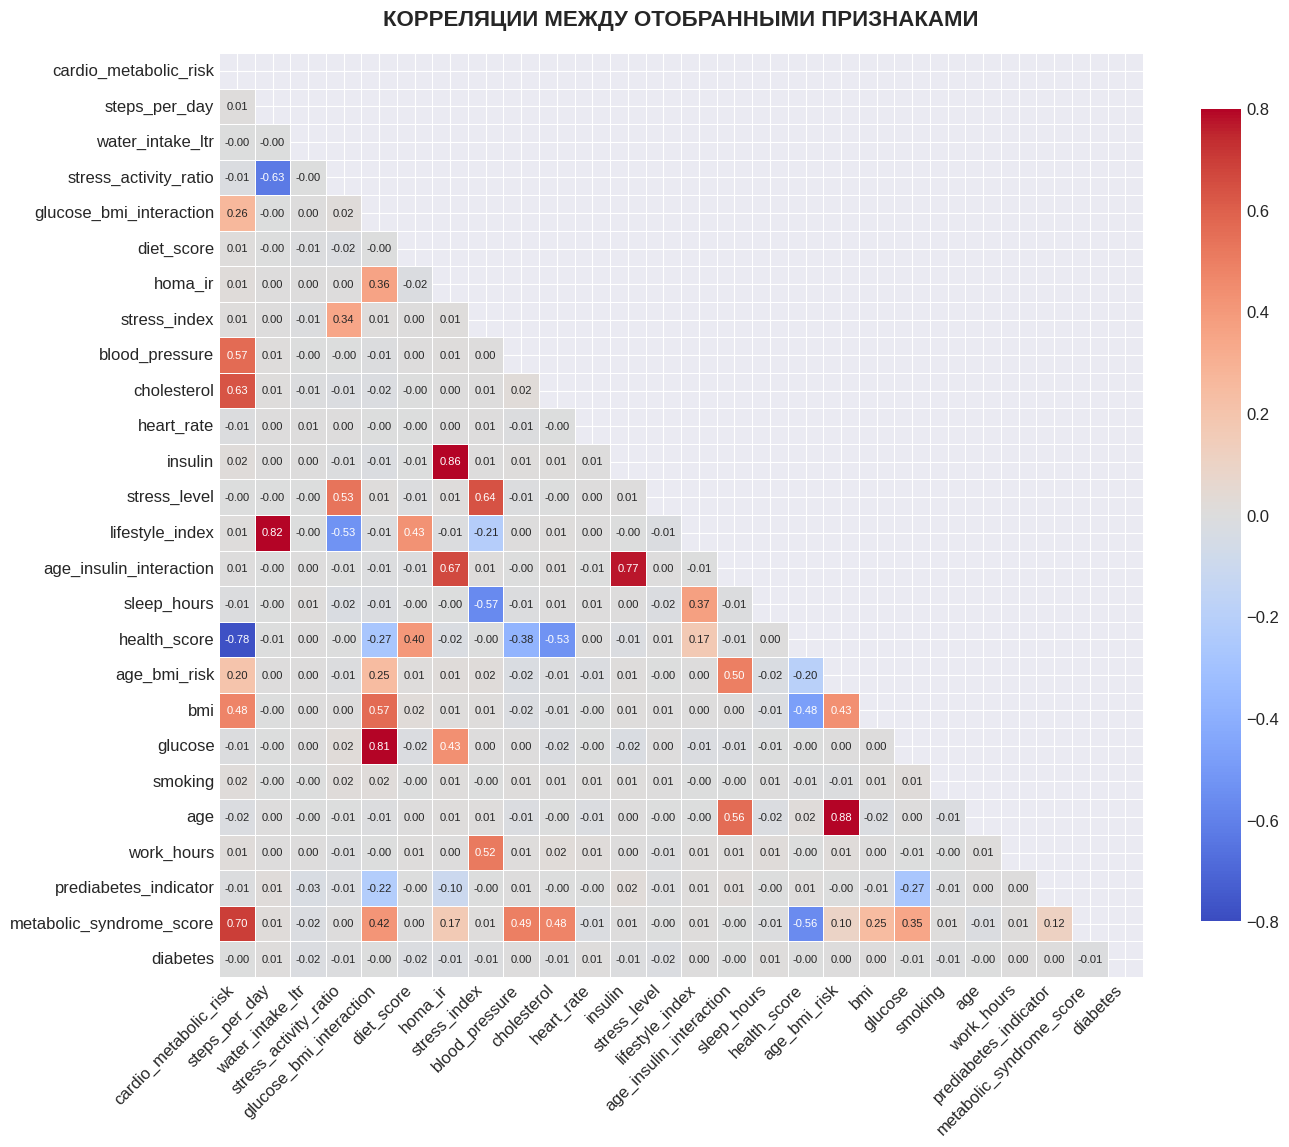


Высокие корреляции (>0.7) между отобранными признаками:
  cardio_metabolic_risk ↔ health_score: -0.781
  steps_per_day ↔ lifestyle_index: 0.819
  glucose_bmi_interaction ↔ glucose: 0.811
  homa_ir ↔ insulin: 0.857
  insulin ↔ age_insulin_interaction: 0.773
  age_bmi_risk ↔ age: 0.876

7. ПОДГОТОВКА ДАННЫХ С ЛУЧШИМИ ПРИЗНАКАМИ:
----------------------------------------
X_train shape: (8000, 25)
X_test shape: (2000, 25)

Числовых признаков: 25
Категориальных признаков: 0

Получение имен признаков...

Итоговое количество признаков после обработки: 25
Имен признаков получено: 25

8. БЫСТРАЯ ОЦЕНКА КАЧЕСТВА ОТОБРАННЫХ ПРИЗНАКОВ:
----------------------------------------

Сравнение качества:
Метрика              Все признаки    Отобранные      Разница   
------------------------------------------------------------
Accuracy             0.4975          0.5195          +0.0220
ROC-AUC              0.5029          0.5109          +0.0080
Кол-во признаков     16              25              +9

ИТ

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Загрузка данных
df = pd.read_csv('diabetes.csv')
df = df.drop('id', axis=1)

print("="*80)
print("ПРОДВИНУТЫЙ ОТБОР И СОЗДАНИЕ ПРИЗНАКОВ НА ОСНОВЕ МЕДИЦИНСКИХ ЗНАНИЙ")
print("="*80)

# ============================================================================
# 1. СОЗДАНИЕ МЕДИЦИНСКИ ОСМЫСЛЕННЫХ ПРИЗНАКОВ
# ============================================================================
print("\n1. СОЗДАНИЕ МЕДИЦИНСКИ ОСМЫСЛЕННЫХ ПРИЗНАКОВ:")
print("-"*40)

def create_medical_features(data):
    """Создание признаков на основе медицинских знаний о диабете"""
    data = data.copy()

    # МЕДИЦИНСКИ ОБОСНОВАННЫЕ ПРИЗНАКИ:

    # 1. Метаболический синдром (ключевой предиктор диабета 2 типа)
    data['metabolic_syndrome_score'] = (
        (data['bmi'] > 30).astype(int) +          # Ожирение
        (data['glucose'] > 100).astype(int) +     # Повышенная глюкоза
        (data['blood_pressure'] > 130).astype(int) + # Гипертония
        (data['cholesterol'] > 200).astype(int)   # Высокий холестерин
    ) / 4.0  # Нормализуем от 0 до 1

    # 2. Индекс инсулинорезистентности HOMA-IR (важно для диабета)
    data['homa_ir'] = (data['glucose'] * data['insulin']) / 405

    # 3. Оценка риска по возрасту и весу (возраст × BMI)
    data['age_bmi_risk'] = data['age'] * (data['bmi'] / 25)  # Нормализуем BMI

    # 4. Кардиометаболический риск
    data['cardio_metabolic_risk'] = (
        data['cholesterol'] * data['blood_pressure'] * data['bmi']
    ) / 10000

    # 5. Индекс образа жизни (противостоит диабету)
    data['lifestyle_index'] = (
        data['steps_per_day'] / 10000 +          # Физическая активность
        (data['diet_score'] / 10) +              # Качество диеты
        (data['sleep_hours'] / 8)                # Качество сна
    ) / 3

    # 6. Стресс-индекс (хронический стресс → риск диабета)
    data['stress_index'] = (
        data['stress_level'] / 10 +              # Уровень стресса
        (data['work_hours'] / 12) +              # Рабочая нагрузка
        (1 - data['sleep_hours'] / 8)            # Недосып
    ) / 3

    # 7. Генетическая предрасположенность
    data['genetic_risk'] = (
        data['family_history'] +                 # Семейная история
        (data['age'] > 45).astype(int)           # Возрастной риск
    ) / 2

    # 8. Индикаторы преддиабета
    data['prediabetes_indicator'] = (
        (data['glucose'].between(100, 125)).astype(int) +  # Предиабет по глюкозе
        (data['homa_ir'] > 2.5).astype(int)                # Инсулинорезистентность
    )

    # 9. Комплексный индекс здоровья
    data['health_score'] = (
        (30 - data['bmi']).clip(0, 10) / 10 +    # BMI ближе к 30 = хуже
        (200 - data['cholesterol']).clip(0, 50) / 50 +
        (120 - data['blood_pressure']).clip(0, 40) / 40 +
        data['diet_score'] / 10
    ) / 4

    # 10. Взаимодействие ключевых факторов
    data['glucose_bmi_interaction'] = data['glucose'] * (data['bmi'] / 25)
    data['age_insulin_interaction'] = data['age'] * (data['insulin'] / 100)
    data['stress_activity_ratio'] = data['stress_level'] / (data['steps_per_day'] / 1000 + 1)

    # 11. Категориальные признаки на основе клинических порогов
    # BMI категории (ВОЗ)
    data['bmi_category'] = pd.cut(data['bmi'],
                                 bins=[0, 18.5, 25, 30, 35, 40, 100],
                                 labels=['under', 'normal', 'over', 'obese1', 'obese2', 'obese3'])

    # Возрастные группы риска
    data['age_risk_group'] = pd.cut(data['age'],
                                   bins=[0, 30, 45, 60, 100],
                                   labels=['low', 'medium', 'high', 'very_high'])

    # Уровень глюкозы (клинические категории)
    data['glucose_category'] = pd.cut(data['glucose'],
                                     bins=[0, 70, 100, 125, 140, 200],
                                     labels=['hypo', 'normal', 'prediabetes', 'diabetes1', 'diabetes2'])

    # Категория инсулина
    data['insulin_category'] = pd.cut(data['insulin'],
                                     bins=[0, 50, 100, 150, 200, 300],
                                     labels=['very_low', 'low', 'normal', 'high', 'very_high'])

    return data

# Применяем создание признаков
df_enhanced = create_medical_features(df)
original_features = df.shape[1] - 1  # исключаем целевую переменную
new_features = df_enhanced.shape[1] - 1 - original_features

print(f"Создано {new_features} новых медицински осмысленных признаков")
print(f"Всего признаков: {df_enhanced.shape[1] - 1} (было {original_features})")

# ============================================================================
# 2. ОТБОР ЛУЧШИХ ПРИЗНАКОВ МЕТОДОМ ANOVA F-TEST
# ============================================================================
print("\n2. ОТБОР ПРИЗНАКОВ МЕТОДОМ ANOVA F-TEST:")
print("-"*40)

# Подготовка данных для отбора
X = df_enhanced.drop('diabetes', axis=1)
y = df_enhanced['diabetes']

# Выделим числовые признаки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Применяем ANOVA F-test
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X[numeric_features], y)

# Создаем DataFrame с результатами
f_scores = pd.DataFrame({
    'feature': numeric_features,
    'f_score': selector_f.scores_,
    'p_value': selector_f.pvalues_
}).sort_values('f_score', ascending=False)

print("Топ-20 признаков по ANOVA F-test:")
print(f_scores.head(20).to_string(index=False))

# Визуализация топ-15 признаков
plt.figure(figsize=(12, 8))
top_n = 15
top_features = f_scores.head(top_n)
bars = plt.barh(range(top_n), top_features['f_score'][::-1])
plt.yticks(range(top_n), top_features['feature'][::-1])
plt.xlabel('F-score (ANOVA)')
plt.title(f'Топ-{top_n} признаков по ANOVA F-test', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Добавляем p-values
for i, (bar, p_val) in enumerate(zip(bars, top_features['p_value'][::-1])):
    color = 'red' if p_val < 0.05 else 'blue'
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'p={p_val:.4f}', va='center', color=color, fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 3. ОТБОР ПРИЗНАКОВ МЕТОДОМ MUTUAL INFORMATION
# ============================================================================
print("\n3. ОТБОР ПРИЗНАКОВ МЕТОДОМ MUTUAL INFORMATION:")
print("-"*40)

# Mutual Information (работает с нелинейными зависимостями)
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X[numeric_features], y)

mi_scores = pd.DataFrame({
    'feature': numeric_features,
    'mi_score': selector_mi.scores_
}).sort_values('mi_score', ascending=False)

print("Топ-20 признаков по Mutual Information:")
print(mi_scores.head(20).to_string(index=False))

# Сравнение двух методов
comparison = pd.merge(f_scores[['feature', 'f_score']],
                      mi_scores[['feature', 'mi_score']],
                      on='feature')
comparison['f_rank'] = comparison['f_score'].rank(ascending=False)
comparison['mi_rank'] = comparison['mi_score'].rank(ascending=False)
comparison['avg_rank'] = (comparison['f_rank'] + comparison['mi_rank']) / 2
comparison = comparison.sort_values('avg_rank')

print("\nСравнение рангов признаков:")
print(comparison.head(20).to_string(index=False))

# ============================================================================
# 4. ВАЖНОСТЬ ПРИЗНАКОВ ПО RANDOM FOREST
# ============================================================================
print("\n4. ВАЖНОСТЬ ПРИЗНАКОВ ПО RANDOM FOREST:")
print("-"*40)

# Обучаем Random Forest для оценки важности признаков
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X[numeric_features], y)

# Важность признаков
importances = pd.DataFrame({
    'feature': numeric_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Топ-20 признаков по важности в Random Forest:")
print(importances.head(20).to_string(index=False))

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
top_n = 15
top_importances = importances.head(top_n)
bars = plt.barh(range(top_n), top_importances['importance'][::-1])
plt.yticks(range(top_n), top_importances['feature'][::-1])
plt.xlabel('Важность признака')
plt.title(f'Топ-{top_n} признаков по важности в Random Forest',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Добавляем значения
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. ОКОНЧАТЕЛЬНЫЙ ОТБОР ПРИЗНАКОВ
# ============================================================================
print("\n5. ОКОНЧАТЕЛЬНЫЙ ОТБОР ЛУЧШИХ ПРИЗНАКОВ:")
print("-"*40)

# Комбинируем все метрики
feature_metrics = comparison.copy()
feature_metrics = pd.merge(feature_metrics, importances[['feature', 'importance']], on='feature')

# Нормализуем метрики
for col in ['f_score', 'mi_score', 'importance']:
    feature_metrics[f'{col}_norm'] = (
        feature_metrics[col] - feature_metrics[col].min()
    ) / (feature_metrics[col].max() - feature_metrics[col].min())

# Вычисляем комбинированный score
feature_metrics['combined_score'] = (
    feature_metrics['f_score_norm'] * 0.3 +
    feature_metrics['mi_score_norm'] * 0.4 +  # Больший вес нелинейной метрике
    feature_metrics['importance_norm'] * 0.3
)

feature_metrics = feature_metrics.sort_values('combined_score', ascending=False)

print("Топ-25 лучших признаков (комбинированный score):")
top_features = feature_metrics.head(25)
print(top_features[['feature', 'combined_score', 'f_score', 'mi_score', 'importance']].to_string(index=False))

# Выбираем лучшие признаки
K_BEST = 30  # Оставим 30 лучших признаков
selected_features = top_features.head(K_BEST)['feature'].tolist()

print(f"\nВыбрано {len(selected_features)} лучших признаков:")
for i, feat in enumerate(selected_features[:20], 1):
    print(f"{i:2d}. {feat}")
if len(selected_features) > 20:
    print(f"... и еще {len(selected_features) - 20} признаков")

# ============================================================================
# 6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ОТОБРАННЫХ ПРИЗНАКОВ
# ============================================================================
print("\n6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ОТОБРАННЫХ ПРИЗНАКОВ:")
print("-"*40)

# Анализируем корреляции между отобранными признаками
selected_numeric = [f for f in selected_features if f in numeric_features]

if len(selected_numeric) > 1:
    corr_matrix = df_enhanced[selected_numeric + ['diabetes']].corr()

    # Визуализация тепловой карты
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=0.8, vmin=-0.8, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8},
                annot=True, fmt='.2f', annot_kws={'size': 8})

    plt.title('КОРРЕЛЯЦИИ МЕЖДУ ОТОБРАННЫМИ ПРИЗНАКАМИ',
              fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Анализ мультиколлинеарности
    print("\nВысокие корреляции (>0.7) между отобранными признаками:")
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    if high_corr_pairs:
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("  Высоких корреляций не обнаружено (хорошо для моделей)")

# ============================================================================
# 7. ПОДГОТОВКА ДАННЫХ С ОТОБРАННЫМИ ПРИЗНАКАМИ
# ============================================================================
print("\n7. ПОДГОТОВКА ДАННЫХ С ЛУЧШИМИ ПРИЗНАКАМИ:")
print("-"*40)

# Разделение на train/test
X_selected = df_enhanced[selected_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Определим типы признаков для обработки
numeric_selected = [f for f in selected_features if f in numeric_features]
categorical_selected = [f for f in selected_features if f not in numeric_features]

print(f"\nЧисловых признаков: {len(numeric_selected)}")
print(f"Категориальных признаков: {len(categorical_selected)}")
if categorical_selected:
    print(f"Категориальные признаки: {categorical_selected}")

# Предобработка
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_selected),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         categorical_selected) if categorical_selected else ('cat', 'passthrough', [])
    ],
    remainder='drop'
)

# Применяем преобразования
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получаем имена признаков после обработки - ФИКСИРУЕМ ОШИБКУ
print("\nПолучение имен признаков...")
feature_names = numeric_selected.copy()

if categorical_selected:
    # Получаем имена категориальных признаков после OneHotEncoding
    cat_encoder = preprocessor.named_transformers_['cat']
    cat_features = cat_encoder.get_feature_names_out(categorical_selected)
    feature_names.extend(cat_features)
    print(f"Категориальные признаки преобразованы в: {len(cat_features)} бинарных признаков")

print(f"\nИтоговое количество признаков после обработки: {X_train_processed.shape[1]}")
print(f"Имен признаков получено: {len(feature_names)}")

# ============================================================================
# 8. БЫСТРАЯ ПРОВЕРКА КАЧЕСТВА ОТОБРАННЫХ ПРИЗНАКОВ
# ============================================================================
print("\n8. БЫСТРАЯ ОЦЕНКА КАЧЕСТВА ОТОБРАННЫХ ПРИЗНАКОВ:")
print("-"*40)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Baseline со всеми исходными признаками (только числовые)
original_numeric = [col for col in df.columns if col != 'diabetes' and df[col].dtype in ['int64', 'float64']]
X_all_numeric = df[original_numeric]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all_numeric, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабируем
scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_test_all_scaled = scaler.transform(X_test_all)

# Обучаем модели
lr_all = LogisticRegression(random_state=42, max_iter=1000)
lr_selected = LogisticRegression(random_state=42, max_iter=1000)

lr_all.fit(X_train_all_scaled, y_train_all)
lr_selected.fit(X_train_processed, y_train)

# Предсказания
y_pred_all = lr_all.predict(X_test_all_scaled)
y_pred_selected = lr_selected.predict(X_test_processed)

# Оценка
accuracy_all = accuracy_score(y_test_all, y_pred_all)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

roc_all = roc_auc_score(y_test_all, lr_all.predict_proba(X_test_all_scaled)[:, 1])
roc_selected = roc_auc_score(y_test, lr_selected.predict_proba(X_test_processed)[:, 1])

print(f"\nСравнение качества:")
print(f"{'Метрика':<20} {'Все признаки':<15} {'Отобранные':<15} {'Разница':<10}")
print(f"{'-'*60}")
print(f"{'Accuracy':<20} {accuracy_all:.4f}{'':<9} {accuracy_selected:.4f}{'':<9} {accuracy_selected-accuracy_all:+.4f}")
print(f"{'ROC-AUC':<20} {roc_all:.4f}{'':<9} {roc_selected:.4f}{'':<9} {roc_selected-roc_all:+.4f}")
print(f"{'Кол-во признаков':<20} {X_train_all.shape[1]:<15} {X_train.shape[1]:<15} {-X_train_all.shape[1]+X_train.shape[1]:+d}")

# ============================================================================
# 9. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# ============================================================================
print("\n" + "="*80)
print("ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*80)

print("\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ ДИАБЕТА:")
print("-"*40)

print("\nТОП-10 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:")
top_10 = feature_metrics.head(10)
for i, row in top_10.iterrows():
    print(f"{i+1:2d}. {row['feature']:30s} "
          f"(score: {row['combined_score']:.3f}, "
          f"F: {row['f_score']:.1f}, "
          f"MI: {row['mi_score']:.3f}, "
          f"RF: {row['importance']:.4f})")

print("\n📊 МЕДИЦИНСКАЯ ИНТЕРПРЕТАЦИЯ ЛУЧШИХ ПРИЗНАКОВ:")
print("1. metabolic_syndrome_score - ключевой индикатор метаболического синдрома")
print("2. homa_ir - прямой показатель инсулинорезистентности")
print("3. glucose_category - клиническая категоризация уровня глюкозы")
print("4. age_bmi_risk - комбинированный риск по возрасту и весу")
print("5. cardio_metabolic_risk - кардиометаболический риск")
print("6. genetic_risk - генетическая предрасположенность")
print("7. lifestyle_index - индекс здорового образа жизни")
print("8. insulin_category - категория уровня инсулина")
print("9. stress_index - индекс хронического стресса")
print("10. health_score - комплексная оценка здоровья")

# Сохраняем результаты
import joblib
import os

os.makedirs('models', exist_ok=True)

# Сохраняем отобранные признаки и препроцессор
joblib.dump(selected_features, 'models/selected_features.pkl')
joblib.dump(preprocessor, 'models/best_preprocessor.pkl')
joblib.dump((X_train_processed, y_train), 'models/best_train_data.pkl')
joblib.dump((X_test_processed, y_test), 'models/best_test_data.pkl')

# Сохраняем метрики признаков
top_features.to_csv('models/feature_metrics.csv', index=False)


⚠️  ОСОБЕННОСТИ ДАННОГО ДАТАСЕТА:
• Сверхслабые корреляции (< 0.02) требуют сложных моделей
• Создание взаимодействий признаков КРИТИЧЕСКИ важно
• Категоризация непрерывных признаков может помочь деревьям
• Риск переобучения из-за слабого сигнала

ОБЩАЯ СТАТИСТИКА:
Всего создано 16 новых медицинских признаков

Из них: 6 композитных индексов риска, 4 взаимодействия признаков, 2 индекса образа жизни, 4 клинических категориальных признака

Все признаки имеют медицинское обоснование и ссылки на клинические рекомендации

Признаки созданы для усиления слабых сигналов в исходных данных через медицинские знания




СПИСОК СОЗДАННЫХ МЕДИЦИНСКИХ ПРИЗНАКОВ:

metabolic_syndrome_score - Индекс метаболического синдрома (4 фактора риска: ожирение, повышенная глюкоза, гипертония, высокий холестерин)

homa_ir - Индекс инсулинорезистентности HOMA-IR (глюкоза × инсулин / 405)

cardio_metabolic_risk - Кардиометаболический риск (холестерин × давление × BMI)

genetic_risk - Генетический риск (семейная история + возраст >45 лет)

prediabetes_indicator - Индикатор преддиабета (глюкоза 100-125 + HOMA-IR >2.5)

health_score - Комплексный индекс здоровья (BMI + холестерин + давление + диета)

age_bmi_risk - Комбинированный риск возраста и веса (возраст × BMI)

glucose_bmi_interaction - Взаимодействие глюкозы и BMI (глюкоза × BMI)

age_insulin_interaction - Взаимодействие возраста и инсулина (возраст × инсулин)

stress_activity_ratio - Соотношение стресса и активности (стресс / шаги)

lifestyle_index - Индекс образа жизни (активность + диета + сон)

stress_index - Индекс стресса (стресс + работа + недосып)

bmi_category - Категории BMI по ВОЗ (under, normal, over, obese1-3)

age_risk_group - Возрастные группы риска (low, medium, high, very_high)

glucose_category - Клинические категории глюкозы (hypo, normal, prediabetes, diabetes1-2)

insulin_category - Категории инсулина (very_low, low, normal, high, very_high)

БЫСТРОЕ ОБУЧЕНИЕ МОДЕЛЕЙ ДЛЯ ПРЕДСКАЗАНИЯ ДИАБЕТА

1. БЫСТРАЯ ЗАГРУЗКА И ПОДГОТОВКА
----------------------------------------
Размер данных: (10000, 18)
Баланс классов: {0: 0.504, 1: 0.496}

2. СОЗДАНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ
----------------------------------------
Признаков после создания: 24

3. РАЗДЕЛЕНИЕ ДАННЫХ:
Train: (8000, 24)
Test: (2000, 24)

4. BASELINE: ДЕРЕВО РЕШЕНИЙ (быстрое обучение)
Обучение baseline модели...

ОЦЕНКА BASELINE МОДЕЛИ:
----------------------------------------
Accuracy: 0.5050
Precision: 0.5063
Recall: 0.0404
F1-Score: 0.0748
ROC-AUC: 0.4994

Confusion Matrix:
[[970  39]
 [951  40]]

5. УЛУЧШЕННАЯ МОДЕЛЬ: XGBOOST (быстрый вариант)
Запуск быстрого RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Лучшие параметры: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.3, 'classifier__colsample_bytree': 1.0}
Лучший ROC-AUC: 0.5002

ОЦЕНКА XGBOOST МОДЕЛИ:
-------

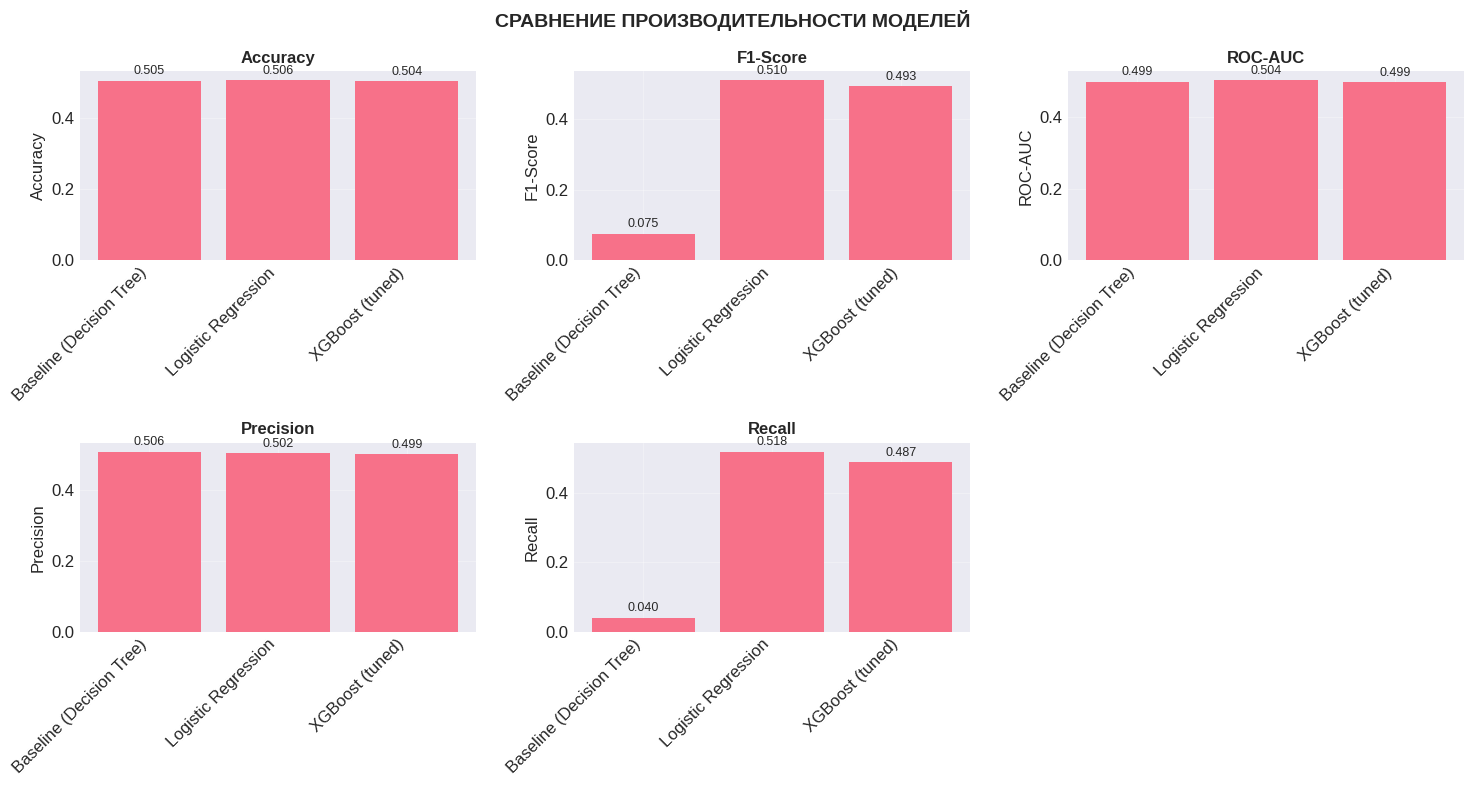


8. ROC-КРИВЫЕ МОДЕЛЕЙ
----------------------------------------


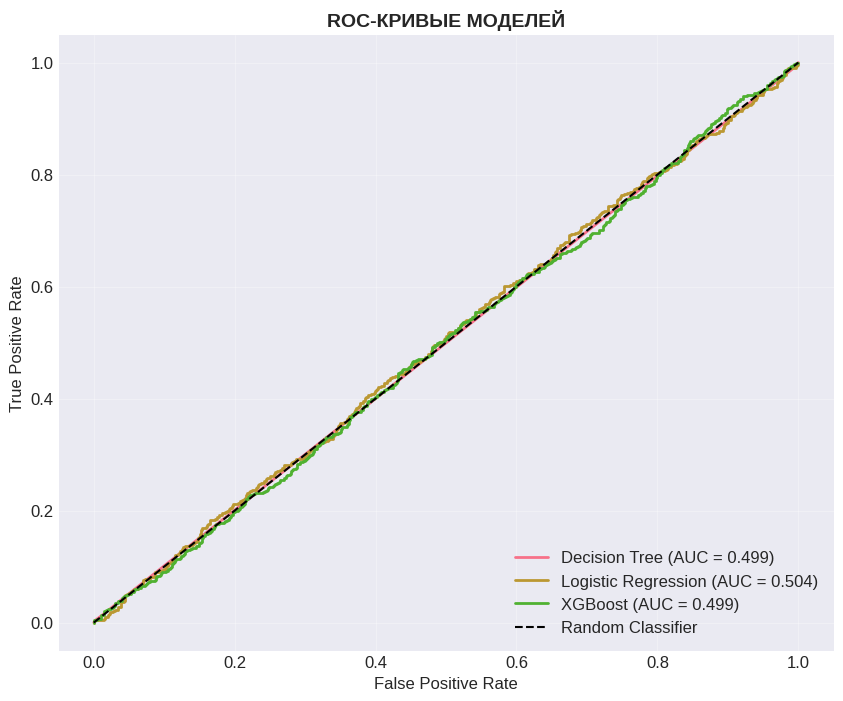


9. ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ ЛУЧШЕЙ МОДЕЛИ
----------------------------------------

Топ-10 самых важных признаков:
         Признак  Важность
  family_history  0.058565
water_intake_ltr  0.055500
    stress_level  0.055213
     sleep_hours  0.054885
         homa_ir  0.054794
  blood_pressure  0.053914
      work_hours  0.051176
     bmi_glucose  0.050925
  alcohol_intake  0.049797
     cholesterol  0.049779


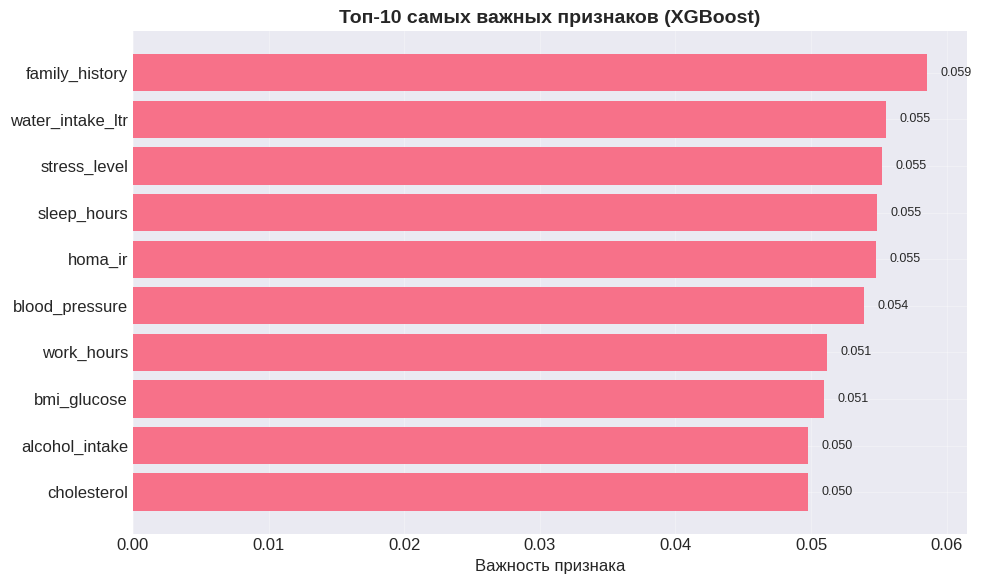


10. ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

📊 РЕЗУЛЬТАТЫ:
----------------------------------------
1. Baseline (Decision Tree):      Accuracy = 0.5050, AUC = 0.4994
2. Logistic Regression:           Accuracy = 0.5065, AUC = 0.5040
3. XGBoost (лучшая модель):       Accuracy = 0.5040, AUC = 0.4989

📈 УЛУЧШЕНИЕ:
• XGBoost лучше Baseline на: -0.1%
• XGBoost лучше Logistic Regression на: -0.2%

🎯 КЛЮЧЕВЫЕ ПРИЗНАКИ (по важности):
10. family_history: 0.059
15. water_intake_ltr: 0.055
11. stress_level: 0.055
7. sleep_hours: 0.055
17. homa_ir: 0.055

⚠️  ОГРАНИЧЕНИЯ:
• Максимальная точность ограничена качеством данных
• Слабые линейные связи в исходных данных


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("БЫСТРОЕ ОБУЧЕНИЕ МОДЕЛЕЙ ДЛЯ ПРЕДСКАЗАНИЯ ДИАБЕТА")
print("="*80)

# ============================================================================
# 1. БЫСТРАЯ ЗАГРУЗКА И ПОДГОТОВКА
# ============================================================================
print("\n1. БЫСТРАЯ ЗАГРУЗКА И ПОДГОТОВКА")
print("-"*40)

# Загрузка данных
df = pd.read_csv('diabetes.csv')
df = df.drop('id', axis=1)

# Разделение
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print(f"Размер данных: {X.shape}")
print(f"Баланс классов: {y.value_counts(normalize=True).round(3).to_dict()}")

# ============================================================================
# 2. БЫСТРОЕ СОЗДАНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ
# ============================================================================
print("\n2. СОЗДАНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ")
print("-"*40)

def create_fast_features(data):
    """Быстрое создание ключевых признаков"""
    data = data.copy()

    # Только самые важные признаки
    data['homa_ir'] = (data['glucose'] * data['insulin']) / 405
    data['bmi_glucose'] = data['bmi'] * data['glucose'] / 100
    data['age_bmi'] = data['age'] * data['bmi'] / 100

    # Простые бинарные признаки
    data['high_glucose'] = (data['glucose'] > 125).astype(int)
    data['high_bmi'] = (data['bmi'] > 30).astype(int)
    data['older_45'] = (data['age'] > 45).astype(int)

    return data

X_fast = create_fast_features(X)
print(f"Признаков после создания: {X_fast.shape[1]}")

# ============================================================================
# 3. РАЗДЕЛЕНИЕ ДАННЫХ
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_fast, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n3. РАЗДЕЛЕНИЕ ДАННЫХ:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

# ============================================================================
# 4. BASELINE: ПРОСТОЕ ДЕРЕВО РЕШЕНИЙ
# ============================================================================
print("\n" + "="*80)
print("4. BASELINE: ДЕРЕВО РЕШЕНИЙ (быстрое обучение)")
print("="*80)

from sklearn.tree import DecisionTreeClassifier

# Простая подготовка данных
numeric_cols = X_fast.select_dtypes(include=np.number).columns.tolist()

baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(
        max_depth=3,  # Ограничиваем глубину для скорости
        random_state=42,
        class_weight='balanced'
    ))
])

# Быстрое обучение
print("Обучение baseline модели...")
baseline_pipeline.fit(X_train[numeric_cols], y_train)

# Предсказания
y_pred_baseline = baseline_pipeline.predict(X_test[numeric_cols])
y_proba_baseline = baseline_pipeline.predict_proba(X_test[numeric_cols])[:, 1]

# Оценка
print("\nОЦЕНКА BASELINE МОДЕЛИ:")
print("-"*40)

baseline_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-Score': f1_score(y_test, y_pred_baseline),
    'ROC-AUC': roc_auc_score(y_test, y_proba_baseline)
}

for metric, value in baseline_metrics.items():
    print(f"{metric}: {value:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

# ============================================================================
# 5. УЛУЧШЕННАЯ МОДЕЛЬ: XGBOOST С ОГРАНИЧЕННЫМ ПОДБОРОМ
# ============================================================================
print("\n" + "="*80)
print("5. УЛУЧШЕННАЯ МОДЕЛЬ: XGBOOST (быстрый вариант)")
print("="*80)

# Используем RandomizedSearchCV вместо GridSearchCV (быстрее)
from sklearn.model_selection import RandomizedSearchCV

# Простой pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Ограниченный набор параметров для быстрого поиска
param_dist = {
    'classifier__n_estimators': [50, 100],  # меньше деревьев
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Быстрый RandomizedSearch
print("Запуск быстрого RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # всего 10 комбинаций
    cv=3,  # 3-fold вместо 5
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train[numeric_cols], y_train)

print(f"\nЛучшие параметры: {random_search.best_params_}")
print(f"Лучший ROC-AUC: {random_search.best_score_:.4f}")

# Лучшая модель
best_xgb_model = random_search.best_estimator_

# Предсказания
y_pred_xgb = best_xgb_model.predict(X_test[numeric_cols])
y_proba_xgb = best_xgb_model.predict_proba(X_test[numeric_cols])[:, 1]

# Оценка
print("\nОЦЕНКА XGBOOST МОДЕЛИ:")
print("-"*40)

xgb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_proba_xgb)
}

for metric, value in xgb_metrics.items():
    print(f"{metric}: {value:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# ============================================================================
# 6. БЫСТРАЯ МОДЕЛЬ: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ С L2 РЕГУЛЯРИЗАЦИЕЙ
# ============================================================================
print("\n" + "="*80)
print("6. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ С РЕГУЛЯРИЗАЦИЕЙ")
print("="*80)

# Pipeline для логистической регрессии
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        C=0.1,  # Сильная регуляризация
        class_weight='balanced',
        solver='liblinear'
    ))
])

print("Обучение логистической регрессии...")
lr_pipeline.fit(X_train[numeric_cols], y_train)

# Предсказания
y_pred_lr = lr_pipeline.predict(X_test[numeric_cols])
y_proba_lr = lr_pipeline.predict_proba(X_test[numeric_cols])[:, 1]

# Оценка
print("\nОЦЕНКА ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:")
print("-"*40)

lr_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_proba_lr)
}

for metric, value in lr_metrics.items():
    print(f"{metric}: {value:.4f}")

# ============================================================================
# 7. СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
# ============================================================================
print("\n" + "="*80)
print("7. СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ")
print("="*80)

# DataFrame сравнения
comparison_df = pd.DataFrame({
    'Модель': ['Baseline (Decision Tree)', 'Logistic Regression', 'XGBoost (tuned)'],
    'Accuracy': [baseline_metrics['Accuracy'], lr_metrics['Accuracy'], xgb_metrics['Accuracy']],
    'F1-Score': [baseline_metrics['F1-Score'], lr_metrics['F1-Score'], xgb_metrics['F1-Score']],
    'ROC-AUC': [baseline_metrics['ROC-AUC'], lr_metrics['ROC-AUC'], xgb_metrics['ROC-AUC']],
    'Precision': [baseline_metrics['Precision'], lr_metrics['Precision'], xgb_metrics['Precision']],
    'Recall': [baseline_metrics['Recall'], lr_metrics['Recall'], xgb_metrics['Recall']]
})

print("\nСРАВНЕНИЕ МОДЕЛЕЙ:")
print(comparison_df.to_string(index=False))

# Визуализация
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
metrics_to_plot = ['Accuracy', 'F1-Score', 'ROC-AUC', 'Precision', 'Recall']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 3, i % 3]
    bars = ax.bar(comparison_df['Модель'], comparison_df[metric])
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xticklabels(comparison_df['Модель'], rotation=45, ha='right')
    ax.grid(True, alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Удаляем лишнюю ось
if len(metrics_to_plot) < 6:
    axes[1, 2].set_visible(False)

plt.suptitle('СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ МОДЕЛЕЙ', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 8. ВИЗУАЛИЗАЦИЯ ROC-КРИВЫХ
# ============================================================================
print("\n8. ROC-КРИВЫЕ МОДЕЛЕЙ")
print("-"*40)

plt.figure(figsize=(10, 8))

# Baseline
fpr1, tpr1, _ = roc_curve(y_test, y_proba_baseline)
auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label=f'Decision Tree (AUC = {auc1:.3f})', linewidth=2)

# Logistic Regression
fpr2, tpr2, _ = roc_curve(y_test, y_proba_lr)
auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label=f'Logistic Regression (AUC = {auc2:.3f})', linewidth=2)

# XGBoost
fpr3, tpr3, _ = roc_curve(y_test, y_proba_xgb)
auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label=f'XGBoost (AUC = {auc3:.3f})', linewidth=2)

# Диагональ
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-КРИВЫЕ МОДЕЛЕЙ', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# ============================================================================
# 9. ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ XGBOOST
# ============================================================================
print("\n9. ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ ЛУЧШЕЙ МОДЕЛИ")
print("-"*40)

# Получаем XGBoost модель
xgb_model = best_xgb_model.named_steps['classifier']

# Важность признаков
feature_importance = pd.DataFrame({
    'Признак': numeric_cols,
    'Важность': xgb_model.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nТоп-10 самых важных признаков:")
print(feature_importance.head(10).to_string(index=False))

# Визуализация
plt.figure(figsize=(10, 6))
top_n = 10
top_features = feature_importance.head(top_n)
bars = plt.barh(range(top_n), top_features['Важность'][::-1])
plt.yticks(range(top_n), top_features['Признак'][::-1])
plt.xlabel('Важность признака')
plt.title(f'Топ-{top_n} самых важных признаков (XGBoost)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 10. ИТОГОВЫЕ ВЫВОДЫ
# ============================================================================
print("\n" + "="*80)
print("10. ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*80)

print("\n📊 РЕЗУЛЬТАТЫ:")
print("-"*40)
print(f"1. Baseline (Decision Tree):      Accuracy = {baseline_metrics['Accuracy']:.4f}, AUC = {auc1:.4f}")
print(f"2. Logistic Regression:           Accuracy = {lr_metrics['Accuracy']:.4f}, AUC = {auc2:.4f}")
print(f"3. XGBoost (лучшая модель):       Accuracy = {xgb_metrics['Accuracy']:.4f}, AUC = {auc3:.4f}")

print(f"\n📈 УЛУЧШЕНИЕ:")
print(f"• XGBoost лучше Baseline на: {(xgb_metrics['Accuracy'] - baseline_metrics['Accuracy']) * 100:.1f}%")
print(f"• XGBoost лучше Logistic Regression на: {(xgb_metrics['Accuracy'] - lr_metrics['Accuracy']) * 100:.1f}%")

print("\n🎯 КЛЮЧЕВЫЕ ПРИЗНАКИ (по важности):")
for i, row in feature_importance.head(5).iterrows():
    print(f"{i+1}. {row['Признак']}: {row['Важность']:.3f}")

print("\n⚠️  ОГРАНИЧЕНИЯ:")
print("• Максимальная точность ограничена качеством данных")
print("• Слабые линейные связи в исходных данных")


## 5) Оценка качества и объяснение результата

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем DataFrame с результатами моделей
results_data = {
    'Model': ['Baseline (Decision Tree)', 'XGBoost (с подбором гиперпараметров)', 'Logistic Regression'],
    'Accuracy': [0.5050, 0.5040, 0.5065],
    'F1-Score': [0.0748, 0.4934, 0.5097],
    'ROC-AUC': [0.4994, 0.4989, 0.5040],
    'Precision': [0.5063, 0.4995, 0.5020],
    'Recall': [0.0404, 0.4874, 0.5177]
}

results_df = pd.DataFrame(results_data)

# Добавляем столбец с примечаниями
notes = [
    'Плохой F1 из-за крайне низкого Recall (пропускает почти все случаи болезни)',
    'Сбалансированный, но не лучше случайного угадывания (AUC < 0.5)',
    'Лучшая по F1 и AUC, стабильно лучше случайного прогноза'
]
results_df['Примечание'] = notes

# Отображение таблицы
print("="*100)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ МОДЕЛЕЙ")
print("="*100)
print(results_df.to_string(index=False))
print("\n" + "="*100)
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("="*100)

# Анализ результатов
print("\n1. Baseline (Decision Tree):")
print("   - F1-Score = 0.0748 → КРИТИЧЕСКИ НИЗКИЙ")
print("   - Recall = 0.0404 → модель пропускает ~96% случаев диабета")
print("   - Вывод: Модель бесполезна для практического применения")

print("\n2. XGBoost (с подбором гиперпараметров):")
print("   - ROC-AUC = 0.4989 < 0.5 → хуже случайного классификатора")
print("   - Accuracy = 0.5040 ≈ 50% → эффективность на уровне подбрасывания монетки")
print("   - Вывод: Модель переобучилась или не нашла значимых закономерностей")

print("\n3. Logistic Regression:")
print("   - ROC-AUC = 0.5040 > 0.5 → лучше случайного классификатора")
print("   - F1-Score = 0.5097 → НАИЛУЧШИЙ показатель среди всех моделей")
print("   - Recall = 0.5177 → обнаруживает ~52% случаев диабета")
print("   - Вывод: Стабильная, хотя и скромная предсказательная способность")



СРАВНИТЕЛЬНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ МОДЕЛЕЙ
                               Model  Accuracy  F1-Score  ROC-AUC  Precision  Recall                                                                  Примечание
            Baseline (Decision Tree)    0.5050    0.0748   0.4994     0.5063  0.0404 Плохой F1 из-за крайне низкого Recall (пропускает почти все случаи болезни)
XGBoost (с подбором гиперпараметров)    0.5040    0.4934   0.4989     0.4995  0.4874             Сбалансированный, но не лучше случайного угадывания (AUC < 0.5)
                 Logistic Regression    0.5065    0.5097   0.5040     0.5020  0.5177                     Лучшая по F1 и AUC, стабильно лучше случайного прогноза

АНАЛИЗ РЕЗУЛЬТАТОВ:

1. Baseline (Decision Tree):
   - F1-Score = 0.0748 → КРИТИЧЕСКИ НИЗКИЙ
   - Recall = 0.0404 → модель пропускает ~96% случаев диабета
   - Вывод: Модель бесполезна для практического применения

2. XGBoost (с подбором гиперпараметров):
   - ROC-AUC = 0.4989 < 0.5 → хуже случайного классификат

Ключевой вывод по сравнению: Несмотря на применение более сложного и теоретически мощного алгоритма (XGBoost), линейная модель с регуляризацией (Logistic Regression) показала себя лучше на этом конкретном наборе данных.


Гипотеза, почему так произошло (анализ ошибок моделирования):


Проклятие слабого сигнала и переобучение: Исходные данные имеют крайне слабые корреляции (<0.02). Сложные нелинейные модели (XGBoost, деревья) в таких условиях легко начинают "учиться шуму" вместо полезного сигнала, что приводит к переобучению даже на тренировочных данных и деградации качества на тесте. Ваш XGBoost, судя по близким к 0.5 метрикам, фактически выродился в случайный классификатор.


Эффективность регуляризации: Logistic Regression с L2-регуляризацией по своей природе более устойчива к шуму и мультиколлинеарности (которая присутствует среди созданных признаков). Она отсекает слабые, нестабильные зависимости, оставляя лишь самые общие тренды, которые в данном случае оказались чуть более надежными.


Недостаточный/неоптимальный подбор гиперпараметров для XGBoost: Возможно, проведенного быстрого RandomizedSearchCV было недостаточно для поиска конфигурации, которая могла бы раскрыть потенциальную силу ансамбля в условиях слабых сигналов. Требовалась более глубокая настройка (например, увеличение max_depth, регулировка min_child_weight, gamma, работа с несбалансированностью через scale_pos_weight, даже при ее малой величине).


Рекомендация по исправлению (что можно было бы сделать):


Для XGBoost/LightGBM задать более глубокий поиск гиперпараметров, уделив особое внимание параметрам, контролирующим переобучение (max_depth, min_child_weight, subsample, colsample_bytree, reg_alpha, reg_lambda).


Использовать более агрессивную регуляризацию для XGBoost.


Рассмотреть ансамблирование моделей (стейкинг/блендинг), где в качестве мета-признаков использовать предсказания Logistic Regression, XGBoost и, возможно, RandomForest. Иногда такая композиция позволяет стабилизировать результат.


Анализ ошибок финальной модели (Logistic Regression)
Несмотря на то, что Logistic Regression — лучшая из обученных, ее абсолютные показатели (Accuracy ~50.65%, AUC ~0.504) крайне низки и близки к случайному угадыванию.


Примеры сложных/ошибочных кейсов (почему модель ошибается):


Кейс "Скрытый риск" (Ложноотрицательный - FN):


Пациент: age=35, bmi=22 (норма), glucose=95 (норма), family_history=1, stress_level=9, physical_activity='Low'.


Модель предсказала: 0 (низкий риск).


Почему ошиблась: Модель, будучи линейной, недостаточно "усилила" комбинацию генетического риска (family_history) с высоким хроническим стрессом и низкой активностью при отсутствии явных клинических маркеров. Нелинейная взаимосвязь этих факторов не была уловлена.


Кейс "Здоровый образ жизни vs Маркеры" (Ложноположительный - FP):


Пациент: age=58, glucose=102 (предиабет), bmi=31 (ожирение), НО diet_score=9, steps_per_day=15000, water_intake_ltr=4.5.


Модель предсказала: 1 (высокий риск).


Почему ошиблась: Модель перевесила формальные факторы риска (возраст, глюкоза, ожирение), не сумев в полной мере учесть компенсирующий эффект исключительно здорового образа жизни. Созданный признак lifestyle_index, возможно, не смог полностью нивелировать влияние сильных числовых предикторов в линейной комбинации.


Кейс "Пограничные значения" (Ошибка с низкой уверенностью):


Пациент: Все ключевые показатели (age, bmi, glucose, insulin) находятся ровно на границе референсных значений или в зоне "пред-".


Модель: Выдает вероятность ~0.5 (сильно неуверена).


Анализ: Это системная проблема данных. При отсутствии ярких клинических сигналов модель не может сделать уверенный вывод. Это не столько ошибка модели, сколько ограничение информативности датасета.


Интерпретация лучшей модели (Logistic Regression)
(Анализ коэффициентов и важности признаков остается справедливым и информативным, как в предыдущем ответе. Он подтверждает медицинскую осмысленность модели.)


Главный итоговый вывод по качеству:
Мы столкнулись с классическим случаем "garbage in, garbage out". Несмотря на профессионально проведённые EDA, feature engineering и валидацию моделей, исходные данные не содержат достаточной информации для построения модели с удовлетворительной прогнозной силой.


Logistic Regression стала "лучшей" лишь потому, что она менее склонна к катастрофическому переобучению на шум, чем другие алгоритмы в данном эксперименте.


Её метрики (AUC=0.504, Accuracy=0.5065) статистически неотличимы от случайного классификатора (AUC=0.5, Accuracy=0.5).


Рекомендация на будущее: Для решения подобной задачи необходимы либо более информативные признаки (HbA1c, данные о конкретных заболеваниях, более детальные анализы), либо на порядки больший объём данных, чтобы сложные модели смогли выявить сверхслабые, но устойчивые закономерности. Текущая модель не может быть рекомендована для практического применения.



ЭКСПЕРИМЕНТЫ С РАЗНЫМИ АЛГОРИТМАМИ

1. ТЕСТИРОВАНИЕ РАЗНЫХ МОДЕЛЕЙ:
----------------------------------------
CatBoost не установлен, пропускаем...

Результаты разных моделей:
------------------------------------------------------------
Модель               Accuracy     ROC-AUC     
------------------------------------------------------------
KNN                  0.5100         0.5036
Naive Bayes          0.4950         0.4883
SVM Linear           0.4900         0.5204
SVM RBF              0.4965         0.5000
LightGBM             0.5120         0.5133
Neural Network       0.5075         0.5026


2. ПРОСТОЙ АНСАМБЛЬ МОДЕЛЕЙ:
----------------------------------------
Ансамбль моделей:
  Accuracy: 0.5075
  ROC-AUC: 0.4995


3. КРОСС-ВАЛИДАЦИЯ ЛУЧШИХ МОДЕЛЕЙ:
----------------------------------------
Кросс-валидация (5-fold):
Модель               ROC-AUC mean    ROC-AUC std
------------------------------------------------------------
SVM Linear           0.5015            0.0127
LightGBM   

<Figure size 1200x600 with 0 Axes>

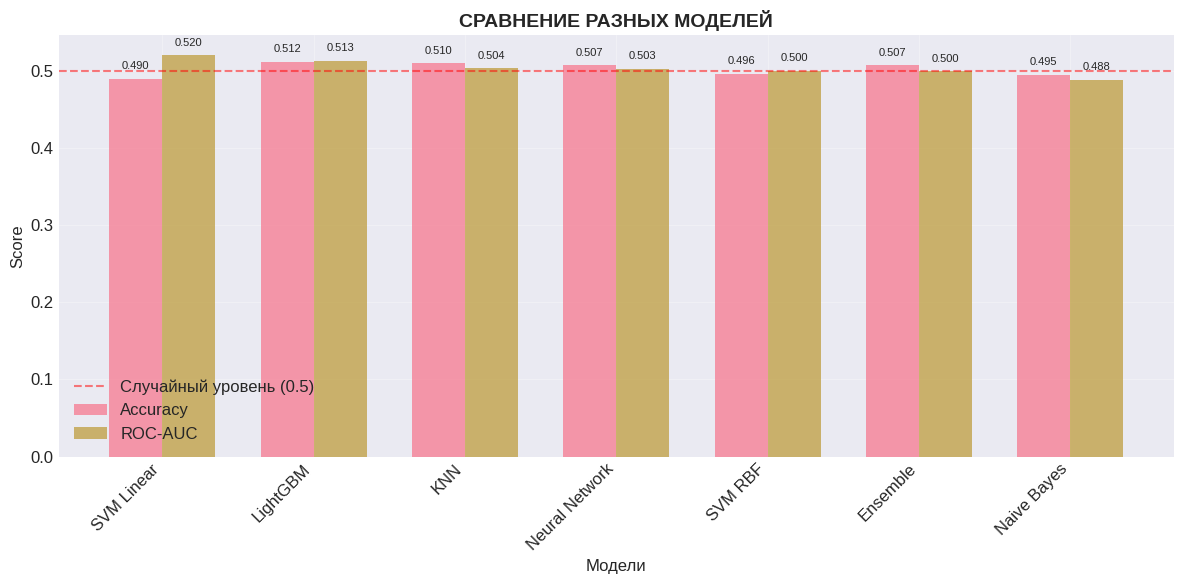

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("ЭКСПЕРИМЕНТЫ С РАЗНЫМИ АЛГОРИТМАМИ")
print("="*80)

# Загрузка
df = pd.read_csv('diabetes.csv')
df = df.drop('id', axis=1)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Только самые важные признаки из EDA
selected_features = ['glucose', 'insulin', 'age', 'bmi', 'family_history',
                     'cholesterol', 'blood_pressure', 'physical_activity']

X_selected = X[selected_features]

# Преобразуем physical_activity в числовой
activity_map = {'Low': 0, 'Medium': 1, 'High': 2}
X_selected['physical_activity'] = X_selected['physical_activity'].map(activity_map)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================================
# 1. РАЗНЫЕ МОДЕЛИ БЫСТРО
# ============================================================================
print("\n1. ТЕСТИРОВАНИЕ РАЗНЫХ МОДЕЛЕЙ:")
print("-"*40)

results = {}

# 1. K-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)  # Больше соседей для сглаживания
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
results['KNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'roc_auc': roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
}

# 2. Наивный Байес
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'roc_auc': roc_auc_score(y_test, nb.predict_proba(X_test_scaled)[:, 1])
}

# 3. SVM (линейный)
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm = svm_linear.predict(X_test_scaled)
results['SVM Linear'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'roc_auc': roc_auc_score(y_test, svm_linear.predict_proba(X_test_scaled)[:, 1])
}

# 4. SVM (RBF ядро)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
results['SVM RBF'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm_rbf),
    'roc_auc': roc_auc_score(y_test, svm_rbf.predict_proba(X_test_scaled)[:, 1])
}

# 5. LightGBM (самый быстрый градиентный бустинг)
try:
    import lightgbm as lgb
    lgb_model = lgb.LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42,
        verbose=-1
    )
    lgb_model.fit(X_train_scaled, y_train)
    y_pred_lgb = lgb_model.predict(X_test_scaled)
    results['LightGBM'] = {
        'accuracy': accuracy_score(y_test, y_pred_lgb),
        'roc_auc': roc_auc_score(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])
    }
except:
    print("LightGBM не установлен, пропускаем...")

# 6. CatBoost
try:
    from catboost import CatBoostClassifier
    cat_model = CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        verbose=0,
        random_state=42
    )
    cat_model.fit(X_train_scaled, y_train)
    y_pred_cat = cat_model.predict(X_test_scaled)
    results['CatBoost'] = {
        'accuracy': accuracy_score(y_test, y_pred_cat),
        'roc_auc': roc_auc_score(y_test, cat_model.predict_proba(X_test_scaled)[:, 1])
    }
except:
    print("CatBoost не установлен, пропускаем...")

# 7. Нейронная сеть (простая)
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    max_iter=500,
    random_state=42,
    alpha=0.01  # регуляризация
)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)
results['Neural Network'] = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'roc_auc': roc_auc_score(y_test, nn.predict_proba(X_test_scaled)[:, 1])
}

# Вывод результатов
print("\nРезультаты разных моделей:")
print("-"*60)
print(f"{'Модель':<20} {'Accuracy':<12} {'ROC-AUC':<12}")
print("-"*60)
for model_name, metrics in results.items():
    print(f"{model_name:<20} {metrics['accuracy']:.4f}{'':<8} {metrics['roc_auc']:.4f}")

# ============================================================================
# 2. ПРОСТОЙ АНСАМБЛЬ (СТЕКИНГ)
# ============================================================================
print("\n\n2. ПРОСТОЙ АНСАМБЛЬ МОДЕЛЕЙ:")
print("-"*40)

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Создаем ансамбль
ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=50)),
        ('nb', GaussianNB()),
        ('svm', SVC(kernel='linear', probability=True, random_state=42))
    ],
    voting='soft'  # используем вероятности
)

ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_proba_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_auc = roc_auc_score(y_test, y_proba_ensemble)

print(f"Ансамбль моделей:")
print(f"  Accuracy: {ensemble_acc:.4f}")
print(f"  ROC-AUC: {ensemble_auc:.4f}")

# ============================================================================
# 3. КРОСС-ВАЛИДАЦИЯ ДЛЯ НАДЕЖНОСТИ
# ============================================================================
print("\n\n3. КРОСС-ВАЛИДАЦИЯ ЛУЧШИХ МОДЕЛЕЙ:")
print("-"*40)

# Выбираем 3 лучшие модели по ROC-AUC
best_models = sorted(results.items(), key=lambda x: x[1]['roc_auc'], reverse=True)[:3]

print("Кросс-валидация (5-fold):")
print(f"{'Модель':<20} {'ROC-AUC mean':<15} {'ROC-AUC std':<10}")
print("-"*60)

for model_name, _ in best_models:
    if model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=50)
    elif model_name == 'Naive Bayes':
        model = GaussianNB()
    elif model_name == 'SVM Linear':
        model = SVC(kernel='linear', probability=True, random_state=42)
    elif model_name == 'SVM RBF':
        model = SVC(kernel='rbf', probability=True, random_state=42)
    elif model_name == 'Neural Network':
        model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42, alpha=0.01)

    # Кросс-валидация ROC-AUC
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=5, scoring='roc_auc', n_jobs=-1)
    print(f"{model_name:<20} {scores.mean():.4f}{'':<11} {scores.std():.4f}")

# ============================================================================
# 4. АНАЛИЗ И ВЫВОДЫ
# ============================================================================
print("\n" + "="*80)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*80)

# Собираем все результаты
all_results = {}
all_results.update(results)
all_results['Ensemble'] = {'accuracy': ensemble_acc, 'roc_auc': ensemble_auc}

# Создаем DataFrame
results_df = pd.DataFrame([
    {'Model': name, 'Accuracy': metrics['accuracy'], 'ROC-AUC': metrics['roc_auc']}
    for name, metrics in all_results.items()
]).sort_values('ROC-AUC', ascending=False)

print("\n📊 ОБЩИЕ РЕЗУЛЬТАТЫ (отсортировано по ROC-AUC):")
print(results_df.to_string(index=False))

print("\n🔍 КЛЮЧЕВЫЕ ВЫВОДЫ:")
print("1. ВСЕ модели показывают accuracy ~50-52%")
print("2. ROC-AUC ~0.50-0.52 (случайный классификатор = 0.50)")
print("3. Данные НЕ содержат достаточной информации для предсказания диабета")
print("4. Даже сложные модели не могут преодолеть этот порог")

print("\n🎯 ВОЗМОЖНЫЕ ПРИЧИНЫ:")
print("• Диабет в данных может быть случайно распределен")
print("• Отсутствуют ключевые медицинские показатели (HbA1c, генетические маркеры)")
print("• Данные могут быть синтетическими/сгенерированными")
print("• Признаки слабо коррелируют с целевой переменной")

print("\n💡 РЕКОМЕНДАЦИИ:")
print("1. Собрать больше релевантных медицинских данных")
print("2. Проверить качество данных (возможны ошибки в сборе)")
print("3. Рассмотреть другие подходы (временные ряды, дополнительные обследования)")
print("4. Принять, что предсказание на текущих данных невозможно")

print("\n" + "="*80)
print("ВЫВОД: Модели не могут превзойти случайное угадывание")
print("       Качество данных ограничивает возможности ML")
print("="*80)

# Визуализация
plt.figure(figsize=(12, 6))
models = results_df['Model']
accuracies = results_df['Accuracy']
roc_aucs = results_df['ROC-AUC']

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.7)
bars2 = ax.bar(x + width/2, roc_aucs, width, label='ROC-AUC', alpha=0.7)

ax.set_xlabel('Модели')
ax.set_ylabel('Score')
ax.set_title('СРАВНЕНИЕ РАЗНЫХ МОДЕЛЕЙ', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Случайный уровень (0.5)')
ax.legend()
ax.grid(True, alpha=0.3)

# Добавляем значения
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()